# Data Exploration OLD

In [55]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import json
import random
from datetime import datetime

from sklearn.preprocessing import PowerTransformer, StandardScaler, RobustScaler, MinMaxScaler


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization,Dropout, SimpleRNN, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import MeanAbsolutePercentageError
from tensorflow.keras import losses

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
#from sklearn.metrics import mean_absolute_percentage_error

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

import statsmodels.api as sm
from statsmodels.formula.api import ols, glm
import xgboost as xgb
from catboost import CatBoostRegressor

from scipy.special import boxcox1p, inv_boxcox1p
from scipy import stats
from scipy.stats import norm, skew

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

import lightgbm as lgb
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC, Ridge
from sklearn.svm import SVR

from pycaret.regression import * 

import optuna 
import joblib
from optuna import Trial, visualization
from optuna.samplers import TPESampler

import warnings
warnings.filterwarnings("ignore")


%matplotlib inline

pd.set_option('display.float_format', lambda x: '%.5f' % x)

sns.set_style("white")
matplotlib.rc('xtick', labelsize=15)
matplotlib.rc('ytick', labelsize=15)
plt.rcParams['figure.figsize'] = [16.0, 10.0]

def mean_absolute_percentage_error(y_pred, y_true):
    return np.mean(np.abs((y_true - y_pred) / y_true))

In [89]:
dates = [
    '201902', '201903', '201904', '201905', '201907', '201908', '201909',
    '201910', '201911', '202001', '202002', '202003', '202004', '202005',
    '202007', '202008', '202009', '202010', '202011'
]
seed=556
p = 0.05
bc_dataframe = []
for date in dates:
    df = pd.read_csv(
             f"train_{date}_cleaned.csv",
             header=0,
             skiprows=lambda i: i>0 and random.random() > p
    ).drop("Unnamed: 0", axis=1)
    bc_dataframe.append(df)
bc_dataframe = pd.concat(bc_dataframe, axis=0)

In [5]:
bc_dataframe

,periodo,id_cli,edad,genero,estado_civil,nivel_academico,ocupacion,tipo_vivienda,ult_actual,categoria,...,saldo_no_rot_mdo,cuota_libranza_sf,cant_oblig_tot_sf,ind,rep_calif_cred,pol_centr_ext,convenio_lib,ingreso_nomina,ingreso_segurida_social,gasto_familiar
0,201902,2586604,46,F,CAS,UNIVERSITARIO,Independiente,\N,20180810,1,...,140000.00000,0.00000,0,4263513.10000,H,NApl,N,0.00000,0.00000,1355030.00000
1,201902,3898166,43,M,NI,BACHILLER,Comerciante,\N,20180912,4,...,0.00000,0.00000,0,1030200.00000,NApl,incumple,N,0.00000,0.00000,6447.00000
2,201902,3530319,44,F,SOL,SIN INFORMACION,Empleado,\N,20181018,1,...,136754000.00000,0.00000,8,1545690.00000,E,cumple,N,0.00000,0.00000,733965.99000
3,201902,6637866,33,F,UL,SIN INFORMACION,Empleado,\N,20190108,1,...,60000.00000,0.00000,2,1714450.00000,H,NApl,N,0.00000,0.00000,526861.24000
4,201902,2903203,30,F,SOL,UNIVERSITARIO,Empleado,\N,20180712,2,...,116646000.00000,0.00000,6,3354389.10000,A,cumple,S,5853732.00000,0.00000,264580.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55519,202011,6065464,24,F,CAS,SIN INFORMACION,Empleado,\N,20200304,1,...,41000.00000,0.00000,2,350855.00000,A,cumple,N,1188902.00000,1113000.00000,225353.00000
55520,202011,2061236,43,F,SOL,UNIVERSITARIO,Empleado,\N,20200622,2,...,0.00000,0.00000,1,3601550.39000,A,cumple,N,0.00000,0.00000,2942929.00000
55521,202011,4768846,49,F,SOL,UNIVERSITARIO,Empleado,\N,20200519,1,...,0.00000,0.00000,0,-90696.81000,D,incumple,N,0.00000,0.00000,191993.53000
55522,202011,2076800,25,M,CAS,UNIVERSITARIO,Empleado,\N,20200518,1,...,139000.00000,0.00000,3,458450.00000,C,NApl,N,0.00000,0.00000,340971.00000


In [15]:
pct_spending=len(bc_dataframe[(bc_dataframe['gasto_familiar'] < 10000000) &
             (bc_dataframe['gasto_familiar'] >= 50000)]['gasto_familiar']) / len(bc_dataframe)
print(f"Porcentaje de personas con gastos familiares entre 50000 y 10 millones: {pct_spending}")

Porcentaje de personas con gastos familiares entre 50000 y 10 millones: 0.8978223465093832


# Preprocessing class

In [34]:
np.quantile(bc_dataframe['gasto_familiar'], 0.07)

55000.0

In [128]:
class DataFramePreProcessor:
    
    def __init__(self, dataframe, test=False):
        self.test = test
        self.original_dataframe = dataframe.copy()
        self.modeling_dataframe = None
    
    
    def handleMissingData(self, dataframe):
        dataframe['ingreso_final'] = dataframe['ingreso_final'].fillna(0)
        #dataframe['ind'] = dataframe['ind'].fillna(0)
        dataframe['tipo_vivienda'] = dataframe['tipo_vivienda'].fillna("NO INFORMA")
        dataframe['categoria'] = dataframe['categoria'].fillna("6")
        dataframe['estado_civil'] =dataframe['estado_civil'].fillna("NI")
        #dataframe['departamento_residencia'] = dataframe['departamento_residencia'].fillna("SIN INFORMACION")
        #dataframe['ocupacion'] = dataframe['ocupacion'].fillna("Otro")
        dataframe['ind_mora_vigente']  = dataframe['ind_mora_vigente'].fillna("N") 
        dataframe['ind'] = dataframe['ind'].fillna(0)
        return dataframe
    
    # Borrar filas deacuerdo a cierta logica de negocio
    def rowFilter(self, dataframe):
        cut = 0.99
        return  dataframe[
                (dataframe['gasto_familiar'] >= 60000) &
                (dataframe['gasto_familiar'] <= 2500000) &
                (dataframe['ingreso_final'] < np.quantile(dataframe['ingreso_final'], cut)) &
                (dataframe['cupo_total_tc'] < np.quantile(dataframe['cupo_total_tc'], cut)) & # Percentil 99%
                (dataframe['cuota_tc_bancolombia'] < np.quantile(dataframe['cuota_tc_bancolombia'], cut)) & # percentil 99.99%
                (dataframe['cuota_de_vivienda'] < np.quantile(dataframe['cuota_de_vivienda'], cut)) &# Percentil 99.99%
                (dataframe['cuota_de_consumo'] < np.quantile(dataframe['cuota_de_consumo'], cut)) & # percentil 99%
                (dataframe['cuota_rotativos'] < np.quantile(dataframe['cuota_rotativos'], cut))& # percentil 99.99%
                (dataframe['cuota_tarjeta_de_credito'] < np.quantile(dataframe['cuota_tarjeta_de_credito'], cut)) & 
                (dataframe['cuota_de_sector_solidario'] < np.quantile(dataframe['cuota_de_sector_solidario'], cut)) &
                (dataframe['cuota_sector_real_comercio'] < np.quantile(dataframe['cuota_sector_real_comercio'], cut)) &# Percentil 99.5%
                (dataframe['cuota_libranza_sf'] < np.quantile(dataframe['cuota_libranza_sf'], cut)) & # Percentil 99
                (dataframe['ingreso_segurida_social'] < np.quantile(dataframe['ingreso_segurida_social'], cut)) & # percentil 99.9
                (dataframe['ingreso_nomina'] < np.quantile(dataframe['ingreso_nomina'], cut)) &
                (dataframe['saldo_prom3_tdc_mdo'] < np.quantile(dataframe['saldo_prom3_tdc_mdo'], cut)) &
                (dataframe['saldo_no_rot_mdo'] < np.quantile(dataframe['saldo_no_rot_mdo'], cut)) &
                (dataframe['cuota_cred_hipot'] < np.quantile(dataframe['cuota_cred_hipot'], cut)) &
                (dataframe['mediana_nom3'] < np.quantile(dataframe['mediana_nom3'], cut)) &
                (dataframe['mediana_pen3'] < np.quantile(dataframe['mediana_pen3'], cut)) &
                (dataframe['cuota_tc_mdo'] < np.quantile(dataframe['cuota_tc_mdo'], cut)) &
                (dataframe['ingreso_nompen'] < np.quantile(dataframe['ingreso_nompen'], cut)) &
                (dataframe['cant_oblig_tot_sf'] <= 15) &
                (dataframe['ctas_activas'] < 5) &
                (dataframe['nro_tot_cuentas'] < 5) 
               # (dataframe['ind_mora_vigente'] != 'NApl') 
               # (dataframe['ind'] < np.quantile(dataframe['ind'], cut))
              #  ~(dataframe['departamento_residencia'].isin(['MADRID', 'ESTADO DE LA FLORIDA', 'VAUPES']))
            ] 

    
    def oneEncodeVariables(self):
        pass
    
    def newVars(self, dataframe):
        pct_vars = [
            'cuota_cred_hipot',
            'cuota_tarjeta_de_credito',
            'cuota_de_consumo',
            'cuota_rotativos',
            'cuota_sector_real_comercio',
            'cuota_de_sector_solidario',
            'cuota_tc_bancolombia',
            'cuota_libranza_sf',
            'cupo_total_tc',
            'cupo_tc_mdo'
        ]
        
        cat_vars = [
            #'mora_max', # Tal vez haya que encontrar el umbral correcto
            'estado_civil',
            #'rep_calif_cred',
            'ocupacion',
            'tipo_vivienda',
            #'cat_edad'
            'nivel_academico'
            # 'pol_centr_ext' # En test no existen personas con cero
        ]
        dataframe['tipo_vivienda'] =  np.where(dataframe['tipo_vivienda'].isin(["\\N", "NO INFORMA"]),"OTRO",
                                               np.where(dataframe['tipo_vivienda'].isin(['FAMILIAR','ALQUILADA']), "FAM_ALQ",
                                                        dataframe['tipo_vivienda']
                                                       )
                                             )
        
        dataframe['ocupacion'] = np.where(dataframe['ocupacion'] != "Empleado", "Otro", dataframe['ocupacion'])
        dataframe['edad'] = np.where(dataframe['edad'] < 18, 18,
                                    np.where(dataframe['edad'] > 80, 80, dataframe['edad']
                                    ))
        dataframe['estado_civil'] = np.where(dataframe['estado_civil'].isin(['NI', 'VIU', 'OTRO', 'NI', 'DIV']), 
                                             "OTRO", dataframe['estado_civil'])
        
        dataframe['categoria']=np.where(dataframe['categoria']=='\\N', "6",dataframe['categoria'])
        dataframe['categoria']=dataframe['categoria'].astype(float).astype(int)
        dataframe['cat_edad'] = np.where(dataframe['edad'] < 30, "M30",
                                 np.where(dataframe['edad'] < 40, "M30_40",
                                          np.where(dataframe['edad'] < 50, "M40_50", "M60")))
        dataframe['cuota_cred_hipot'] = dataframe[['cuota_cred_hipot', 'cuota_de_vivienda']].max(axis=1)
        dataframe['total_cuota'] = dataframe['cuota_cred_hipot'] + \
                                   dataframe['cuota_tarjeta_de_credito'] + \
                                   dataframe['cuota_de_consumo'] + \
                                   dataframe['cuota_rotativos'] + \
                                   dataframe['cuota_de_sector_solidario'] + \
                                   dataframe['cuota_libranza_sf'] + \
                                   dataframe['cuota_tarjeta_de_credito'] + \
                                   dataframe['cuota_tc_bancolombia']
        
        dataframe['saldo_favor']  = np.where(dataframe['total_cuota']<0, dataframe['total_cuota']*-1, 0)
        dataframe['total_cuota'] = np.where(dataframe['total_cuota']<0,0, dataframe['total_cuota'])
        
        dataframe['ingreso_calculado'] =  dataframe['ingreso_segurida_social']  +  \
                                          dataframe[['ingreso_nompen', 'ingreso_nomina']].max(axis=1) 
        dataframe['ingreso_corr'] = dataframe[['ingreso_final', 'ingreso_calculado']].max(axis=1)
        dataframe['ind_pct'] = dataframe['ind'] / dataframe['ingreso_corr']
        dataframe.replace([np.inf, -np.inf, np.nan], 0, inplace=True)
        dataframe['total_cupo'] = dataframe['cupo_total_tc'] + dataframe['cupo_tc_mdo']
        
        
        for var in pct_vars:
            dataframe[f"{var}_pct"] = dataframe[var] / dataframe['ingreso_final'] 
            dataframe[f"{var}_pct"] = dataframe[f"{var}_pct"].replace(dict.fromkeys([np.nan, np.inf], 0))
                    
        
        dataframe['obl_total_pct'] = dataframe['cuota_cred_hipot_pct'] + \
                                     dataframe['cuota_tarjeta_de_credito_pct'] +\
                                     dataframe['cuota_de_consumo_pct'] + \
                                     dataframe['cuota_rotativos_pct'] + \
                                     dataframe['cuota_sector_real_comercio_pct'] + \
                                     dataframe['cuota_de_sector_solidario_pct'] + \
                                     dataframe['cuota_tc_bancolombia_pct'] 
        
        dataframe['total_cuota_2']  =dataframe['total_cuota']**2
                           

        if not self.test:
            numeric_feats = dataframe.drop(['gasto_familiar'], axis=1).dtypes[
                    (dataframe.dtypes == "float64")].index

        else:
             numeric_feats = dataframe.dtypes[
                    (dataframe.dtypes == "float64")].index
        skewed_feats = dataframe[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
        skewness = pd.DataFrame({'Skew' :skewed_feats})
        skewness = skewness[abs(skewness) > 0.85]


        skewed_features = skewness.index
        lam = 0.15
        PT_transformer = PowerTransformer()
        for feat in skewed_features:
            dataframe[feat] = boxcox1p(dataframe[feat], lam)
            #dataframe[feat] = PT_transformer.fit_transform(dataframe[feat].values.reshape(-1,1))
            
        dummified = []
        for var in cat_vars:
            dummified.append(
                pd.get_dummies(dataframe[var], drop_first=True, prefix=var)
            )
        
        dummified = pd.concat(dummified, axis=1)
        dataframe = pd.concat([dataframe.drop(cat_vars, axis=1),dummified], axis=1)

        #for var in pct_vars:
        #    dataframe[f"{var}_log"] = np.log1p(dataframe[var])
 
        dataframe['genero'] = np.where(dataframe['genero'] == 'M', 0, 1)
        dataframe['ind_mora_vigente'] = np.where(dataframe['ind_mora_vigente'] == "S", 1, 0)
        dataframe['convenio_lib'] = np.where(dataframe['convenio_lib'] == 'S', 1, 0)

        #if not self.test:
        #    dataframe = dataframe[dataframe['ingreso_corr'] < 15000000]

        if not self.test:
            # dataframe['gasto_familiar'] = np.where(dataframe['gasto_familiar'] < 0, 0, dataframe['gasto_familiar'])
            dataframe['log_gasto_familiar'] = np.log1p(dataframe['gasto_familiar']) 
            
        #dataframe['ingreso_final'] = np.log(dataframe['ingreso_final']+1)
        #dataframe['cupo_total_tc'] = np.log(dataframe['cupo_total_tc']+1)
        #dataframe['ingreso_nomina'] = np.log(dataframe['ingreso_nomina']+1)
        #dataframe['ingreso_segurida_social'] = np.log(dataframe['ingreso_segurida_social']+1)
        #dataframe['ingreso_nompen'] = np.log(dataframe['ingreso_nompen']+1)
        #dataframe['ingreso_calculado'] = np.log(dataframe['ingreso_calculado']+1)
        #dataframe['cupo_total_tc'] = np.log1p(dataframe['cupo_total_tc'])
        #dataframe['cupo_tc_mdo'] = np.log1p(dataframe['cupo_tc_mdo'])
    
    


        #dataframe['obl_total_pct'] = np.log1p(dataframe['obl_total_pct'])
        

                                
        
        #dataframe['interact_ing_gen']  = dataframe['genero'] * dataframe['ingreso_corr']
        #dataframe['interact_ing_ed']  = dataframe['edad'] * dataframe['ingreso_corr']
        #dataframe['interact_cup_gen']  = dataframe['genero'] * dataframe['cupo_total_tc']
        #dataframe['interact_cup_ed']  = dataframe['edad'] * dataframe['cupo_total_tc']
        #dataframe['interact_obl_gen'] = dataframe['genero'] * dataframe['obl_total_pct']
        #dataframe['interact_obl_ed']  = dataframe['edad'] * dataframe['obl_total_pct']
        
        #dataframe['ingreso_cero'] = np.where(dataframe['ingreso_corr'] == 0, 1, 0)
        #dataframe['ingreso_geo_alto']  = np.where(dataframe['ingreso_corr'] < 14.90, 1, 0) # ALgo mas tecnico
        #dataframe['es_ciudad_principal'] = np.where(
        #    dataframe['departamento_residencia'].isin(['BOGOTA D.C.', 'ANTIOQUIA', 'VALLE', 'CUNDINAMARCA']), 1,0)
        
        #dataframe['pc25'] = np.where(dataframe['ingreso_corr'] <= np.quantile(dataframe['ingreso_corr'],0.25), 1, 0)
        #dataframe['pc75'] = np.where(dataframe['ingreso_corr'] >= np.quantile(dataframe['ingreso_corr'],0.75), 1, 0)
        
        # variables al cuadrado
        
        
        
        #dataframe['edad_2'] = dataframe['edad']**2
        #dataframe['total_cupo_2']  =dataframe['total_cupo']**2
        #dataframe['obl_total_pct_2'] = dataframe['obl_total_pct']**2
        #dataframe['ingreso_corr2'] = dataframe['ingreso_corr']**2 
        
        #dataframe['obl_total_pct'] = boxcox1p(dataframe['obl_total_pct'], 0.15)
        #dataframe['cuota_cred_hipot'] = boxcox1p(dataframe['cuota_cred_hipot'], 0.15)
        #dataframe['educacion_grupo'] = np.where(
        #    dataframe['nivel_academico'].isin(['PRIMARIO', 'UNIVERSITARIO', 'ESPECIALIZACION']),1,0
        #)
        
        dataframe.replace([np.inf, -np.inf, np.nan], 0, inplace=True)
        # dataframe.drop(['edad'], errors='ignore', inplace=True)
        #if not self.test:
        #    dataframe = dataframe[dataframe['ingreso_corr'] != 0]
        if not self.test:
                dataframe = dataframe[(dataframe == 0).astype(int).sum(axis=1) /dataframe.shape[1] < 0.8]

        return dataframe
    
    def process(self):
        
        complete_df = self.handleMissingData(self.original_dataframe)
        if not self.test:
            filtered_df = self.rowFilter(complete_df)
            grown_df    = self.newVars(filtered_df)
        else:
            grown_df    = self.newVars(complete_df)
        self.modeling_dataframe = grown_df
        
        return self.modeling_dataframe
        

# Hyperparameter tuning

In [91]:
class ModelTuning:
    
    
    def __init__(self, X, y, algorithm):
        self.X = X
        self.y = y
        self.algorithm = algorithm
        self.best_params= None
    
    def objective(self, trial: Trial, X, y, algorithm) -> float:
        
        if algorithm == 'xgb':
                params = {
                    "n_estimators" : trial.suggest_int('n_estimators', 50, 200),
                    'max_depth':trial.suggest_int('max_depth', 5, 20),
                    'reg_alpha':trial.suggest_int('reg_alpha', 0, 8),
                    'reg_lambda':trial.suggest_int('reg_lambda', 0, 8),
                    'min_child_weight':trial.suggest_int('min_child_weight', 0, 5),
                    'gamma':trial.suggest_int('gamma', 0, 5),
                    'learning_rate':trial.suggest_loguniform('learning_rate',0.01,0.5),
                    'colsample_bytree':trial.suggest_discrete_uniform('colsample_bytree',0.1,1,0.01),
                    'nthread' : -1
                }
                model_ = xgb.XGBRegressor(**params)
                
        elif algorithm == 'catboost':
            params = {
                "n_estimators" : trial.suggest_int('n_estimators', 50, 200),
                "learning_rate": trial.suggest_loguniform('learning_rate',0.01,0.5),
                "depth": trial.suggest_int('depth', 6, 10),
                "l2_leaf_reg": trial.suggest_int('l2_leaf_reg', 2, 30),
                "bagging_temperature": trial.suggest_discrete_uniform('bagging_temperature',0.1,1,0.01)
            }
            model_ = CatBoostRegressor(**params, verbose=False)
        elif algorithm == 'light':
            params = {
                 "max_depth ": trial.suggest_int("max_depth ", 6, 15),
                "n_estimators" : trial.suggest_int('n_estimators', 50, 200),
                "reg_alpha ": trial.suggest_loguniform("reg_alpha", 0.01, 100),
                "reg_lambda  ": trial.suggest_loguniform("reg_lambda ", 0.01, 100),
                "learning_rate": trial.suggest_loguniform('learning_rate',0.01,0.5),
                'colsample_bytree':trial.suggest_discrete_uniform('colsample_bytree',0.1,1,0.01)
            }
            model_ =lgb.LGBMRegressor(**params)
        else:
            params = {
            "alpha": trial.suggest_loguniform("alpha", 0.01, 100),
            "l1_ratio": trial.suggest_loguniform("l1_ratio", 0.01, 1),

            }
            model_ = ElasticNet(**params)
            
        # joblib.dump(study, 'study.pkl')
    
        train_X,test_X,train_y,test_y = train_test_split(X, y, test_size = 0.30,random_state = 101)
        model_.fit(train_X,train_y)
        predictions = model_.predict(test_X)

        return mean_absolute_percentage_error(predictions,test_y)
    
    
    def getHyperParameters(self):
        
        study = optuna.create_study(direction='minimize',sampler=TPESampler())
        study.optimize(lambda trial : self.objective(trial, self.X, self.y, self.algorithm),n_trials= 20)
        study.best_trial.params
        print('Best trial {}: score {},\nparams {}'.format(self.algorithm,study.best_trial.value,study.best_trial.params))
        self.best_params=study.best_trial.params

In [92]:
feature_cols = [
     'ingreso_corr',
    'cuota_cred_hipot',
    'cuota_tarjeta_de_credito',
    'cuota_de_consumo',
    'cuota_rotativos',
    'cuota_libranza_sf',
    'genero',
    'cuota_de_sector_solidario',
    'cuota_sector_real_comercio',
    #'ind_mora_vigente',
    'cuota_tc_bancolombia',
    #'cupo_tc_mdo',
    'convenio_lib',
    'cant_oblig_tot_sf',
    'edad',
    'estado_civil_SOL',
    #'estado_civil_CAS',
    'estado_civil_OTRO',
    'nro_tot_cuentas',
    #'ctas_activas',
    #'interact_ing_gen',
    #'interact_ing_ed',
    #'interact_cup_gen',
    #'interact_cup_ed',
    'obl_total_pct',
    #'cupo_total_tc',
    #'total_cuota',
    'tenencia_tc',
    'tiene_consumo',
    'tiene_crediagil',
    #'interact_obl_ed',
    #'interact_obl_gen',
    #'categoria',
    'total_cuota_2',
    #'total_cupo_2',
    #'ingreso_corr2',
    #'obl_total_pct_2',
    'tipo_vivienda_PROPIA',
    'tipo_vivienda_OTRO',
    "saldo_no_rot_mdo",
    #"ind",
    "categoria",
    #"saldo_favor"
    "ind_pct",
    "total_cupo",
    "ocupacion_Otro"
    
]

fe_dataframe = DataFramePreProcessor(bc_dataframe)
fe_dataframe.process()
fe_dataframe.modeling_dataframe.replace([np.nan],0, inplace=True)
X = fe_dataframe.modeling_dataframe[feature_cols]
y = fe_dataframe.modeling_dataframe['log_gasto_familiar']
stack_models = ['xgb', 'catboost', 'light']
best_hyp= {}
for model_ in stack_models:
    tuning_model=ModelTuning(X, y, model_)
    tuning_model.getHyperParameters()
    best_hyp[model_] = tuning_model.best_params
    
with open(f'tuned_hyper_parameters.json', 'w') as fp:
    json.dump(best_hyp, fp, indent=4)

[I 2021-01-30 17:30:20,577] A new study created in memory with name: no-name-5f76520d-3e63-45ee-b476-f91a79416200
[I 2021-01-30 17:30:39,282] Trial 0 finished with value: 0.052340751029596407 and parameters: {'n_estimators': 56, 'max_depth': 12, 'reg_alpha': 1, 'reg_lambda': 6, 'min_child_weight': 1, 'gamma': 5, 'learning_rate': 0.14212116154303045, 'colsample_bytree': 0.11}. Best is trial 0 with value: 0.052340751029596407.
[I 2021-01-30 17:31:41,902] Trial 1 finished with value: 0.051854583405345024 and parameters: {'n_estimators': 159, 'max_depth': 9, 'reg_alpha': 3, 'reg_lambda': 7, 'min_child_weight': 1, 'gamma': 3, 'learning_rate': 0.09281059526445358, 'colsample_bytree': 0.22}. Best is trial 1 with value: 0.051854583405345024.
[I 2021-01-30 17:32:34,737] Trial 2 finished with value: 0.05223618826544825 and parameters: {'n_estimators': 177, 'max_depth': 8, 'reg_alpha': 7, 'reg_lambda': 3, 'min_child_weight': 3, 'gamma': 5, 'learning_rate': 0.03432466711996851, 'colsample_bytree':

Best trial xgb: score 0.05164370099519205,
params {'n_estimators': 167, 'max_depth': 17, 'reg_alpha': 4, 'reg_lambda': 2, 'min_child_weight': 4, 'gamma': 1, 'learning_rate': 0.0539147490096773, 'colsample_bytree': 0.85}


[I 2021-01-30 18:24:41,688] Trial 0 finished with value: 0.052005489863726904 and parameters: {'n_estimators': 99, 'learning_rate': 0.029681305175274706, 'depth': 9, 'l2_leaf_reg': 13, 'bagging_temperature': 0.16}. Best is trial 0 with value: 0.052005489863726904.
[I 2021-01-30 18:25:04,101] Trial 1 finished with value: 0.05178165776781554 and parameters: {'n_estimators': 167, 'learning_rate': 0.09367964200755222, 'depth': 6, 'l2_leaf_reg': 26, 'bagging_temperature': 0.8}. Best is trial 1 with value: 0.05178165776781554.
[I 2021-01-30 18:25:20,811] Trial 2 finished with value: 0.05185817226675122 and parameters: {'n_estimators': 99, 'learning_rate': 0.06822084410427001, 'depth': 7, 'l2_leaf_reg': 9, 'bagging_temperature': 0.54}. Best is trial 1 with value: 0.05178165776781554.
[I 2021-01-30 18:25:37,761] Trial 3 finished with value: 0.0521243505721267 and parameters: {'n_estimators': 116, 'learning_rate': 0.024913915759158172, 'depth': 6, 'l2_leaf_reg': 7, 'bagging_temperature': 0.87}.

Best trial catboost: score 0.05168435732264097,
params {'n_estimators': 200, 'learning_rate': 0.14599749571037995, 'depth': 9, 'l2_leaf_reg': 11, 'bagging_temperature': 1.0}
[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] reg_alpha is set=0.0, reg_alpha= will be ignored. Current value: reg_alpha=0.0
[LightGBM] [Warning] reg_lambda is set=0.0, reg_lambda= will be ignored. Current value: reg_lambda=0.0
[LightGBM] [Warning] Unknown parameter: 0.25442765755056196
[LightGBM] [Warning] Unknown parameter: 13
[LightGBM] [Warning] Unknown parameter: 57.826930497743874


[I 2021-01-30 18:32:42,136] Trial 0 finished with value: 0.05229478372910865 and parameters: {'max_depth ': 13, 'n_estimators': 115, 'reg_alpha': 57.826930497743874, 'reg_lambda ': 0.25442765755056196, 'learning_rate': 0.04434816871735349, 'colsample_bytree': 0.22}. Best is trial 0 with value: 0.05229478372910865.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] reg_alpha is set=0.0, reg_alpha= will be ignored. Current value: reg_alpha=0.0
[LightGBM] [Warning] reg_lambda is set=0.0, reg_lambda= will be ignored. Current value: reg_lambda=0.0
[LightGBM] [Warning] Unknown parameter: 13
[LightGBM] [Warning] Unknown parameter: 48.501665819596454
[LightGBM] [Warning] Unknown parameter: 5.825139961620032


[I 2021-01-30 18:32:52,554] Trial 1 finished with value: 0.05174706648886588 and parameters: {'max_depth ': 13, 'n_estimators': 183, 'reg_alpha': 48.501665819596454, 'reg_lambda ': 5.825139961620032, 'learning_rate': 0.04326855884834058, 'colsample_bytree': 0.83}. Best is trial 1 with value: 0.05174706648886588.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] reg_alpha is set=0.0, reg_alpha= will be ignored. Current value: reg_alpha=0.0
[LightGBM] [Warning] reg_lambda is set=0.0, reg_lambda= will be ignored. Current value: reg_lambda=0.0
[LightGBM] [Warning] Unknown parameter: 9
[LightGBM] [Warning] Unknown parameter: 0.02940830923902616
[LightGBM] [Warning] Unknown parameter: 3.990195227257551


[I 2021-01-30 18:32:59,357] Trial 2 finished with value: 0.05171770483076967 and parameters: {'max_depth ': 9, 'n_estimators': 150, 'reg_alpha': 0.02940830923902616, 'reg_lambda ': 3.990195227257551, 'learning_rate': 0.12837717556029105, 'colsample_bytree': 0.83}. Best is trial 2 with value: 0.05171770483076967.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] reg_alpha is set=0.0, reg_alpha= will be ignored. Current value: reg_alpha=0.0
[LightGBM] [Warning] reg_lambda is set=0.0, reg_lambda= will be ignored. Current value: reg_lambda=0.0
[LightGBM] [Warning] Unknown parameter: 6
[LightGBM] [Warning] Unknown parameter: 1.1288609098345639
[LightGBM] [Warning] Unknown parameter: 12.908140500369546


[I 2021-01-30 18:33:07,498] Trial 3 finished with value: 0.05184516784595094 and parameters: {'max_depth ': 6, 'n_estimators': 158, 'reg_alpha': 1.1288609098345639, 'reg_lambda ': 12.908140500369546, 'learning_rate': 0.402718609483055, 'colsample_bytree': 0.55}. Best is trial 2 with value: 0.05171770483076967.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] reg_alpha is set=0.0, reg_alpha= will be ignored. Current value: reg_alpha=0.0
[LightGBM] [Warning] reg_lambda is set=0.0, reg_lambda= will be ignored. Current value: reg_lambda=0.0
[LightGBM] [Warning] Unknown parameter: 6
[LightGBM] [Warning] Unknown parameter: 2.1215031695576845
[LightGBM] [Warning] Unknown parameter: 10.565220849453862


[I 2021-01-30 18:33:15,051] Trial 4 finished with value: 0.05230699154871901 and parameters: {'max_depth ': 6, 'n_estimators': 118, 'reg_alpha': 2.1215031695576845, 'reg_lambda ': 10.565220849453862, 'learning_rate': 0.01373700844306114, 'colsample_bytree': 0.7}. Best is trial 2 with value: 0.05171770483076967.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] reg_alpha is set=0.0, reg_alpha= will be ignored. Current value: reg_alpha=0.0
[LightGBM] [Warning] reg_lambda is set=0.0, reg_lambda= will be ignored. Current value: reg_lambda=0.0
[LightGBM] [Warning] Unknown parameter: 11.601177437613318
[LightGBM] [Warning] Unknown parameter: 11
[LightGBM] [Warning] Unknown parameter: 3.019692841656472


[I 2021-01-30 18:33:23,503] Trial 5 finished with value: 0.05180386502723265 and parameters: {'max_depth ': 11, 'n_estimators': 156, 'reg_alpha': 3.019692841656472, 'reg_lambda ': 11.601177437613318, 'learning_rate': 0.1836741009042164, 'colsample_bytree': 0.23}. Best is trial 2 with value: 0.05171770483076967.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] reg_alpha is set=0.0, reg_alpha= will be ignored. Current value: reg_alpha=0.0
[LightGBM] [Warning] reg_lambda is set=0.0, reg_lambda= will be ignored. Current value: reg_lambda=0.0
[LightGBM] [Warning] Unknown parameter: 10
[LightGBM] [Warning] Unknown parameter: 5.024203396374825
[LightGBM] [Warning] Unknown parameter: 4.94184885446301


[I 2021-01-30 18:33:30,371] Trial 6 finished with value: 0.0517451595392817 and parameters: {'max_depth ': 10, 'n_estimators': 109, 'reg_alpha': 4.94184885446301, 'reg_lambda ': 5.024203396374825, 'learning_rate': 0.13402367888034575, 'colsample_bytree': 0.41000000000000003}. Best is trial 2 with value: 0.05171770483076967.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] reg_alpha is set=0.0, reg_alpha= will be ignored. Current value: reg_alpha=0.0
[LightGBM] [Warning] reg_lambda is set=0.0, reg_lambda= will be ignored. Current value: reg_lambda=0.0
[LightGBM] [Warning] Unknown parameter: 14
[LightGBM] [Warning] Unknown parameter: 15.51374028932486
[LightGBM] [Warning] Unknown parameter: 0.03178976250618948


[I 2021-01-30 18:33:41,122] Trial 7 finished with value: 0.05273141320852531 and parameters: {'max_depth ': 14, 'n_estimators': 187, 'reg_alpha': 15.51374028932486, 'reg_lambda ': 0.03178976250618948, 'learning_rate': 0.015775548259415795, 'colsample_bytree': 0.19}. Best is trial 2 with value: 0.05171770483076967.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] reg_alpha is set=0.0, reg_alpha= will be ignored. Current value: reg_alpha=0.0
[LightGBM] [Warning] reg_lambda is set=0.0, reg_lambda= will be ignored. Current value: reg_lambda=0.0
[LightGBM] [Warning] Unknown parameter: 15
[LightGBM] [Warning] Unknown parameter: 87.47932160002861
[LightGBM] [Warning] Unknown parameter: 0.010323679461357918


[I 2021-01-30 18:33:44,813] Trial 8 finished with value: 0.051798176715400115 and parameters: {'max_depth ': 15, 'n_estimators': 81, 'reg_alpha': 87.47932160002861, 'reg_lambda ': 0.010323679461357918, 'learning_rate': 0.41922927698125856, 'colsample_bytree': 0.73}. Best is trial 2 with value: 0.05171770483076967.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] reg_alpha is set=0.0, reg_alpha= will be ignored. Current value: reg_alpha=0.0
[LightGBM] [Warning] reg_lambda is set=0.0, reg_lambda= will be ignored. Current value: reg_lambda=0.0
[LightGBM] [Warning] Unknown parameter: 14
[LightGBM] [Warning] Unknown parameter: 0.5782245220950495
[LightGBM] [Warning] Unknown parameter: 0.096452213301645


[I 2021-01-30 18:33:51,376] Trial 9 finished with value: 0.051749949450093286 and parameters: {'max_depth ': 14, 'n_estimators': 120, 'reg_alpha': 0.5782245220950495, 'reg_lambda ': 0.096452213301645, 'learning_rate': 0.2776112952705305, 'colsample_bytree': 0.53}. Best is trial 2 with value: 0.05171770483076967.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] reg_alpha is set=0.0, reg_alpha= will be ignored. Current value: reg_alpha=0.0
[LightGBM] [Warning] reg_lambda is set=0.0, reg_lambda= will be ignored. Current value: reg_lambda=0.0
[LightGBM] [Warning] Unknown parameter: 8
[LightGBM] [Warning] Unknown parameter: 0.013746771942984041
[LightGBM] [Warning] Unknown parameter: 74.20749467024305


[I 2021-01-30 18:33:56,139] Trial 10 finished with value: 0.051828143961475635 and parameters: {'max_depth ': 8, 'n_estimators': 51, 'reg_alpha': 0.013746771942984041, 'reg_lambda ': 74.20749467024305, 'learning_rate': 0.08964830919724508, 'colsample_bytree': 0.96}. Best is trial 2 with value: 0.05171770483076967.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] reg_alpha is set=0.0, reg_alpha= will be ignored. Current value: reg_alpha=0.0
[LightGBM] [Warning] reg_lambda is set=0.0, reg_lambda= will be ignored. Current value: reg_lambda=0.0
[LightGBM] [Warning] Unknown parameter: 9
[LightGBM] [Warning] Unknown parameter: 0.03783562167327413
[LightGBM] [Warning] Unknown parameter: 1.4796240412903534


[I 2021-01-30 18:34:02,049] Trial 11 finished with value: 0.05175822789704218 and parameters: {'max_depth ': 9, 'n_estimators': 88, 'reg_alpha': 0.03783562167327413, 'reg_lambda ': 1.4796240412903534, 'learning_rate': 0.12298525419654963, 'colsample_bytree': 0.45999999999999996}. Best is trial 2 with value: 0.05171770483076967.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] reg_alpha is set=0.0, reg_alpha= will be ignored. Current value: reg_alpha=0.0
[LightGBM] [Warning] reg_lambda is set=0.0, reg_lambda= will be ignored. Current value: reg_lambda=0.0
[LightGBM] [Warning] Unknown parameter: 10
[LightGBM] [Warning] Unknown parameter: 0.14935404836022456
[LightGBM] [Warning] Unknown parameter: 1.4634305356743007


[I 2021-01-30 18:34:10,251] Trial 12 finished with value: 0.051734474934412834 and parameters: {'max_depth ': 10, 'n_estimators': 146, 'reg_alpha': 0.14935404836022456, 'reg_lambda ': 1.4634305356743007, 'learning_rate': 0.1590294242979168, 'colsample_bytree': 0.41000000000000003}. Best is trial 2 with value: 0.05171770483076967.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] reg_alpha is set=0.0, reg_alpha= will be ignored. Current value: reg_alpha=0.0
[LightGBM] [Warning] reg_lambda is set=0.0, reg_lambda= will be ignored. Current value: reg_lambda=0.0
[LightGBM] [Warning] Unknown parameter: 0.8046887019937586
[LightGBM] [Warning] Unknown parameter: 8
[LightGBM] [Warning] Unknown parameter: 0.15815735621471605


[I 2021-01-30 18:34:17,987] Trial 13 finished with value: 0.05175148990334459 and parameters: {'max_depth ': 8, 'n_estimators': 149, 'reg_alpha': 0.15815735621471605, 'reg_lambda ': 0.8046887019937586, 'learning_rate': 0.05598130142539166, 'colsample_bytree': 1.0}. Best is trial 2 with value: 0.05171770483076967.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] reg_alpha is set=0.0, reg_alpha= will be ignored. Current value: reg_alpha=0.0
[LightGBM] [Warning] reg_lambda is set=0.0, reg_lambda= will be ignored. Current value: reg_lambda=0.0
[LightGBM] [Warning] Unknown parameter: 11
[LightGBM] [Warning] Unknown parameter: 0.09430990457725076
[LightGBM] [Warning] Unknown parameter: 55.395308520579256


[I 2021-01-30 18:34:26,580] Trial 14 finished with value: 0.051751141426373014 and parameters: {'max_depth ': 11, 'n_estimators': 143, 'reg_alpha': 0.09430990457725076, 'reg_lambda ': 55.395308520579256, 'learning_rate': 0.2175658443517112, 'colsample_bytree': 0.37}. Best is trial 2 with value: 0.05171770483076967.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] reg_alpha is set=0.0, reg_alpha= will be ignored. Current value: reg_alpha=0.0
[LightGBM] [Warning] reg_lambda is set=0.0, reg_lambda= will be ignored. Current value: reg_lambda=0.0
[LightGBM] [Warning] Unknown parameter: 0.012026785857272324
[LightGBM] [Warning] Unknown parameter: 8
[LightGBM] [Warning] Unknown parameter: 0.8698350698428636


[I 2021-01-30 18:34:37,287] Trial 15 finished with value: 0.051843702109481804 and parameters: {'max_depth ': 8, 'n_estimators': 171, 'reg_alpha': 0.012026785857272324, 'reg_lambda ': 0.8698350698428636, 'learning_rate': 0.026467293802188565, 'colsample_bytree': 0.66}. Best is trial 2 with value: 0.05171770483076967.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] reg_alpha is set=0.0, reg_alpha= will be ignored. Current value: reg_alpha=0.0
[LightGBM] [Warning] reg_lambda is set=0.0, reg_lambda= will be ignored. Current value: reg_lambda=0.0
[LightGBM] [Warning] Unknown parameter: 10
[LightGBM] [Warning] Unknown parameter: 0.2672646107400222
[LightGBM] [Warning] Unknown parameter: 2.5036842523642497


[I 2021-01-30 18:34:45,281] Trial 16 finished with value: 0.05171076972228726 and parameters: {'max_depth ': 10, 'n_estimators': 199, 'reg_alpha': 0.2672646107400222, 'reg_lambda ': 2.5036842523642497, 'learning_rate': 0.09090868242478475, 'colsample_bytree': 0.88}. Best is trial 16 with value: 0.05171076972228726.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] reg_alpha is set=0.0, reg_alpha= will be ignored. Current value: reg_alpha=0.0
[LightGBM] [Warning] reg_lambda is set=0.0, reg_lambda= will be ignored. Current value: reg_lambda=0.0
[LightGBM] [Warning] Unknown parameter: 12
[LightGBM] [Warning] Unknown parameter: 0.37423001650400584
[LightGBM] [Warning] Unknown parameter: 0.24389344537245133


[I 2021-01-30 18:34:53,873] Trial 17 finished with value: 0.05172736815399501 and parameters: {'max_depth ': 12, 'n_estimators': 174, 'reg_alpha': 0.37423001650400584, 'reg_lambda ': 0.24389344537245133, 'learning_rate': 0.07408499195007669, 'colsample_bytree': 0.88}. Best is trial 16 with value: 0.05171076972228726.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] reg_alpha is set=0.0, reg_alpha= will be ignored. Current value: reg_alpha=0.0
[LightGBM] [Warning] reg_lambda is set=0.0, reg_lambda= will be ignored. Current value: reg_lambda=0.0
[LightGBM] [Warning] Unknown parameter: 7
[LightGBM] [Warning] Unknown parameter: 0.0347439968058524
[LightGBM] [Warning] Unknown parameter: 3.428581136509085


[I 2021-01-30 18:35:01,368] Trial 18 finished with value: 0.051714953124855204 and parameters: {'max_depth ': 7, 'n_estimators': 199, 'reg_alpha': 0.0347439968058524, 'reg_lambda ': 3.428581136509085, 'learning_rate': 0.10186851437703218, 'colsample_bytree': 0.76}. Best is trial 16 with value: 0.05171076972228726.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] reg_alpha is set=0.0, reg_alpha= will be ignored. Current value: reg_alpha=0.0
[LightGBM] [Warning] reg_lambda is set=0.0, reg_lambda= will be ignored. Current value: reg_lambda=0.0
[LightGBM] [Warning] Unknown parameter: 7
[LightGBM] [Warning] Unknown parameter: 0.07663394100849265
[LightGBM] [Warning] Unknown parameter: 35.25143437956464


[I 2021-01-30 18:35:12,024] Trial 19 finished with value: 0.05178648103423059 and parameters: {'max_depth ': 7, 'n_estimators': 196, 'reg_alpha': 0.07663394100849265, 'reg_lambda ': 35.25143437956464, 'learning_rate': 0.02878896861136824, 'colsample_bytree': 0.92}. Best is trial 16 with value: 0.05171076972228726.


Best trial light: score 0.05171076972228726,
params {'max_depth ': 10, 'n_estimators': 199, 'reg_alpha': 0.2672646107400222, 'reg_lambda ': 2.5036842523642497, 'learning_rate': 0.09090868242478475, 'colsample_bytree': 0.88}


In [357]:
bc_dataframe.select_dtypes("float")

,cupo_total_tc,cuota_tc_bancolombia,cuota_cred_hipot,mediana_nom3,mediana_pen3,ingreso_nompen,ingreso_final,cuota_de_vivienda,cuota_de_consumo,cuota_rotativos,...,cuota_sector_real_comercio,cupo_tc_mdo,saldo_prom3_tdc_mdo,cuota_tc_mdo,saldo_no_rot_mdo,cuota_libranza_sf,ind,ingreso_nomina,ingreso_segurida_social,gasto_familiar
0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.12474,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.12460,0.00000,0.00000,139900.00000
1,0.12446,0.12328,0.00000,0.12447,0.00000,0.12447,0.12446,0.00000,0.00000,0.00000,...,0.12409,0.00000,0.00000,0.00000,0.12409,0.00000,0.12370,0.12445,0.00000,63238.00000
3,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.12479,0.00000,0.00000,0.00000,...,0.12387,0.00000,0.00000,0.00000,0.12514,0.00000,0.12455,0.00000,0.00000,602210.00000
5,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.12453,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.12428,0.00000,0.00000,533500.00000
6,0.12533,0.12427,0.00000,0.00000,0.00000,0.00000,0.12469,0.00000,0.12393,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.12451,0.00000,0.12429,0.00000,0.00000,350900.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104450,0.00000,0.00000,0.00000,0.12455,0.00000,0.12455,0.12461,0.00000,0.12443,0.00000,...,0.12409,0.12470,0.12466,0.12394,0.12523,0.12422,0.12407,0.12455,0.00000,111083.00000
104451,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.12466,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.12515,0.00000,0.12447,0.00000,0.00000,119070.00000
104453,0.12517,0.12434,0.00000,0.00000,0.00000,0.00000,0.12482,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.12459,0.00000,0.00000,347190.00000
104454,0.00000,0.00000,0.00000,0.12458,0.00000,0.12458,0.12461,0.00000,0.00000,0.00000,...,0.00000,0.12491,0.12317,0.00000,0.00000,0.00000,0.12444,0.12460,0.00000,359169.17000


# Modeling

In [225]:
fe_dataframe.modeling_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103411 entries, 0 to 104014
Columns: 138 entries, Unnamed: 0 to pc90
dtypes: float64(51), int32(9), int64(13), object(5), uint8(60)
memory usage: 64.7+ MB


In [135]:
feature_cols = [
     'ingreso_corr',
    'cuota_cred_hipot',
    'cuota_tarjeta_de_credito',
    'cuota_de_consumo',
    'cuota_rotativos',
    'cuota_libranza_sf',
    'genero',
    'cuota_de_sector_solidario',
    'cuota_sector_real_comercio',
    'ind_mora_vigente',
    'cuota_tc_bancolombia',
    'cupo_tc_mdo',
    'convenio_lib',
    'cant_oblig_tot_sf',
    'edad',
    'estado_civil_SOL',
    #'estado_civil_CAS',
    'estado_civil_OTRO',
    'nro_tot_cuentas',
    #'ctas_activas',
    #'interact_ing_gen',
    #'interact_ing_ed',
    #'interact_cup_gen',
    #'interact_cup_ed',
    'obl_total_pct',
    'cupo_total_tc',
    #'total_cuota',
    'tenencia_tc',
    'tiene_consumo',
    'tiene_crediagil',
    #'interact_obl_ed',
    #'interact_obl_gen',
    #'categoria',
    'total_cuota_2',
    #'total_cupo_2',
    #'ingreso_corr2',
    #'obl_total_pct_2',
    'tipo_vivienda_PROPIA',
    'tipo_vivienda_OTRO',
    "saldo_no_rot_mdo",
    #"ind",
    "categoria",
    #"saldo_favor"
    "ind_pct",
    #"total_cupo",
    "ocupacion_Otro"
    
]

bc_dataframe = pd.read_csv("train_202003_cleaned.csv",skiprows=lambda i: i>0 and random.random() > 0.15)
fe_dataframe = DataFramePreProcessor(bc_dataframe)
fe_dataframe.process()
fe_dataframe.modeling_dataframe.replace([np.nan],0, inplace=True)
X = fe_dataframe.modeling_dataframe[feature_cols]
y = fe_dataframe.modeling_dataframe['log_gasto_familiar']

#scaled_data = scale(X) # promedio de los valores de cada gene debe ser cero con std 1
#pca = PCA()
#pca.fit(scaled_data )# Matemática del PCA
#pca_data = pca.transform(scaled_data)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=50, random_state=101)

cat_reg = CatBoostRegressor(n_estimators=50)
cat_reg.fit(X_train, y_train, verbose=False)
model_lgb = lgb.LGBMRegressor(objective='regression')
model_lgb.fit(X_train, y_train)
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=50, n_jobs=8, num_parallel_tree=1,
             objective='reg:squarederror', random_state=101, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

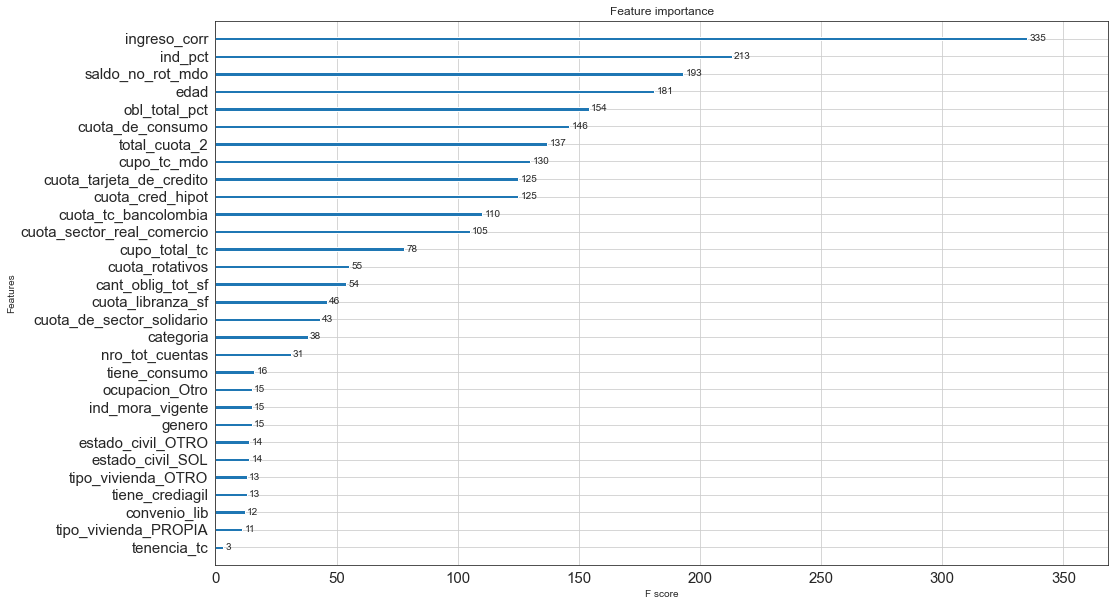

In [136]:
xgb.plot_importance(xgb_reg)

In [137]:
xgb_pred = xgb_reg.predict(X_test)
print("XGBoost: ", mean_absolute_percentage_error(xgb_pred, y_test))

catboost_pred=cat_reg.predict(X_test)
print("Catboost: ", mean_absolute_percentage_error(catboost_pred, y_test))  

lgbm_pred = model_lgb.predict(X_test)
print("LightBoost: ", mean_absolute_percentage_error(lgbm_pred, y_test))  


ensemble_predictions = xgb_pred*0.4 +catboost_pred*0.4 + lgbm_pred*0.2
print("Ensemble: ", mean_absolute_percentage_error(ensemble_predictions, y_test))

XGBoost:  0.050540703287848654
Catboost:  0.050550073921063074
LightBoost:  0.05039764645484969
Ensemble:  0.050413393311486504


In [247]:
X

,ingreso_corr,cant_oblig_tot_sf,edad,nro_tot_cuentas,obl_total_pct,total_cuota,saldo_no_rot_mdo,ind_pct,total_cupo
0,279.36239,0,29,1,0.00000,0.00000,0.00000,0.47021,0.00000
1,278.86174,0,35,1,0.00000,0.00000,0.00000,0.47021,0.00000
2,280.05053,3,40,1,2.05237,215.07177,478.16110,-0.08825,305.53226
3,331.35852,6,31,1,1.93257,264.37511,679.56807,0.35815,398.58159
4,267.03909,2,54,1,0.00000,0.00000,336.39257,0.33446,0.00000
...,...,...,...,...,...,...,...,...,...
224415,268.47172,0,32,1,0.00000,0.00000,0.00000,0.50475,0.00000
224416,227.59328,0,29,1,0.53222,121.13081,0.00000,0.27095,5.67020
224417,244.46135,1,61,1,0.38491,114.74915,0.00000,0.37892,274.55252
224419,228.52574,2,34,1,3.39157,146.23190,614.35834,0.00000,305.53226


# Ensemble Pipeline

In [129]:
print(f"Hora de inicio: {datetime.now()}")

dates = [
    '201902', '201903', '201904', '201905', '201907', '201908', '201909',
    '201910', '201911', '202001', '202002', '202003', '202004', '202005',
    '202007', '202008', '202009', '202010', '202011'
]

test_df = pd.read_csv("test_cleaned.csv")
test_df['cuota_de_consumo'] = np.where(test_df['cuota_de_consumo'] <0 ,0, test_df['cuota_de_consumo'])
test_df_modeling = DataFramePreProcessor(test_df, test=True)
test_df_modeling.process()

last_predictions_list = []
mapes   = []
models = []
p = 0.3
with open('tuned_hyper_parameters.json') as f:
    tuned_hyperparameters = json.load(f)
random.seed(654)
for date in dates:
    print(f"Periodo {date}:")
    raw_dataframe = pd.read_csv(
             f"train_{date}_cleaned.csv",
             header=0,
             skiprows=lambda i: i>0 and random.random() > p
    ).drop("Unnamed: 0", axis=1)
    

    #pd.read_csv(
    #         f"train_{date}_cleaned.csv",
    #         engine='python').drop("Unnamed: 0", axis=1)
    # raw_dataframe = raw_dataframe.sample(frac=0.25, random_state=1984)
    print(f"     Total rows in original_data {raw_dataframe.shape[0]}" )

    fe_dataframe = DataFramePreProcessor(raw_dataframe)
    fe_dataframe.process()
    fe_dataframe.modeling_dataframe.replace([np.nan],0, inplace=True)

    X = fe_dataframe.modeling_dataframe[feature_cols]
    y = fe_dataframe.modeling_dataframe['log_gasto_familiar']
    

    print(f"     Total rows in transformed_data {fe_dataframe.modeling_dataframe.shape[0]}" )

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=89)


    xgb_reg = xgb.XGBRegressor(**tuned_hyperparameters['xgb'])
    cat_reg = CatBoostRegressor(**tuned_hyperparameters['catboost'])
    lgbm_reg = lgb.LGBMRegressor(objective='regression')

    
    xgb_reg.fit(X_train, y_train)
    cat_reg.fit(X_train, y_train, verbose=False)
    lgbm_reg.fit(X_train, y_train)
    
    models.append([xgb_reg, cat_reg, lgbm_reg])
    xgb_pred = xgb_reg.predict(X_test)
    lgbm_pred = lgbm_reg.predict(X_test)
    catboost_pred = cat_reg.predict(X_test)

    ensemble_prediction=xgb_pred*0.4 +catboost_pred*0.3 + lgbm_pred*0.3
    mape = mean_absolute_percentage_error(ensemble_prediction, y_test)
    mapes.append(mape)
    print(f"     MAPE {date}: ", mape )
    
print(f"Hora de finalizacion: {datetime.now()}")

Hora de inicio: 2021-01-30 19:28:00.699165
Periodo 201902:
     Total rows in original_data 314211
     Total rows in transformed_data 213856
     MAPE 201902:  0.05324649602239799
Periodo 201903:
     Total rows in original_data 321099
     Total rows in transformed_data 228688
     MAPE 201903:  0.05282485200133811
Periodo 201904:
     Total rows in original_data 324652
     Total rows in transformed_data 231058
     MAPE 201904:  0.05248167227106614
Periodo 201905:
     Total rows in original_data 325491
     Total rows in transformed_data 237688
     MAPE 201905:  0.05207380780283305
Periodo 201907:
     Total rows in original_data 332058
     Total rows in transformed_data 248433
     MAPE 201907:  0.05184926947054565
Periodo 201908:
     Total rows in original_data 333090
     Total rows in transformed_data 251170
     MAPE 201908:  0.05189739927190411
Periodo 201909:
     Total rows in original_data 334158
     Total rows in transformed_data 253418
     MAPE 201909:  0.051385178

In [130]:
predictions_list = []
for model in models:
    final_predictions_xgb=np.expm1(model[0].predict(test_df_modeling.modeling_dataframe[feature_cols]))
    final_predictions_catboost=np.expm1(model[1].predict(test_df_modeling.modeling_dataframe[feature_cols]))
    final_prediction_lgbm = np.expm1(model[2].predict(test_df_modeling.modeling_dataframe[feature_cols]))
    
    final_prediction=final_predictions_xgb*0.4+ final_predictions_catboost*0.4 + final_prediction_lgbm*0.2
    
    predictions_list.append(final_prediction)
    
final_prediction= np.mean(predictions_list, axis=0)
submission = pd.concat([test_df['id_registro'],pd.Series(final_prediction)], axis=1)
submission.columns = ["id_registro", "gasto_familiar"]
submission['gasto_familiar'] = submission['gasto_familiar'].round(4)
submission

,id_registro,gasto_familiar
0,4055#201902,578174.25130
1,12598#201902,352086.99000
2,23697#201902,581243.73450
3,23768#201902,449483.53180
4,7174#201902,719085.14270
...,...,...
281661,8596193#202011,513187.60240
281662,8616083#202011,629320.48090
281663,8670207#202011,734945.96770
281664,8677655#202011,624320.41830


In [131]:
submission['gasto_familiar'].describe()

count    281666.00000
mean     522185.01643
std      144491.14573
min      240238.50960
25%      410034.11582
50%      511448.66210
75%      612373.30080
max     1265439.94760
Name: gasto_familiar, dtype: float64

In [132]:
submission.to_csv("submission_underground_tuned_XGBCAT.csv", index=False)

In [133]:
np.mean(mapes)

0.051620820364233475

# ranking models

In [ ]:
all_mapes = []
for model in models:
    mape_model = []
    for x_test, y_test in zip(x_tests, y_tests):
        nn_prediction_ = model.predict(x_test).reshape(-1,)
        mape_model.append(mean_absolute_percentage_error(nn_prediction_, y_test))
    all_mapes.append(np.mean(mape_model))

In [ ]:
best_mapes = sorted(range(len(all_mapes)), key=lambda i: all_mapes[i], reverse=False)[:5]
predictions_df = test_df_modeling.modeling_dataframe.drop(["id_registro", "periodo"], axis=1)
nn_stack_predictions = []
for i in best_mapes:
    nn_stack_predictions.append(models[i].predict(predictions_df).reshape(-1,))
nn_stack = np.expm1(np.mean(nn_stack_predictions, axis=0))
nn_stack

In [531]:
catboost_predictions = cat_reg.predict(X_test)
mean_absolute_percentage_error(catboost_predictions, y_test)

0.06809963120806635

In [225]:
import optuna 
import joblib
from optuna import Trial, visualization
from optuna.samplers import TPESampler

# DL pipeline

In [ ]:
print(f"Hora de inicio: {datetime.now()}")
dates = [
    '201902', '201903', '201904', '201905', '201907', '201908', '201909',
    '201910', '201911', '202001', '202002', '202003', '202004', '202005',
    '202007', '202008', '202009', '202010', '202011'
]

test_df = pd.read_csv("test_cleaned.csv")
test_df_modeling = DataFramePreProcessor(test_df, test=True)
test_df_modeling.process()

last_predictions_list = []
y_tests = []
x_tests = []
y_preds = []
mapes   = []
models = []
p = 0.8

callback = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)
optimizer   = Adam(learning_rate=0.003)
nn_metric = MeanAbsolutePercentageError(name='mape') 

random.seed(1234)

for date in dates:
    print(f"Periodo {date}:")
    raw_dataframe = pd.read_csv(
             f"train_{date}_cleaned.csv",
             header=0,
             skiprows=lambda i: i>0 and random.random() > p
    ).drop("Unnamed: 0", axis=1)
    print(f"     Total rows in original_data {raw_dataframe.shape[0]}" )
    fe_dataframe = DataFramePreProcessor(raw_dataframe)
    fe_dataframe.process()
    fe_dataframe.modeling_dataframe.replace([np.nan],0, inplace=True)
    X = fe_dataframe.modeling_dataframe[feature_cols]
    y = fe_dataframe.modeling_dataframe['log_gasto_familiar']
    print(f"     Total rows in transformed_data {fe_dataframe.modeling_dataframe.shape[0]}" )
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=111)

    nn_model = Sequential()
    
    nn_model.add(Dense(128, activation = 'relu', input_shape = (X.shape[1],))) 
    nn_model.add(Dropout(0.2))
    #nn_model.add(Dense(100, activation = 'tanh'))
    nn_model.add(BatchNormalization())
    nn_model.add(Dense(64))
    nn_model.add(Activation('tanh'))
    nn_model.add(Dropout(0.2))
    #nn_model.add(Dense(25, activation = 'relu'))
    nn_model.add(Dense(1))
    nn_model.compile(optimizer =  optimizer, loss = 'mse', metrics = nn_metric)
    history  = nn_model.fit(X_train, y_train, epochs=30, batch_size=64,
                            callbacks=[callback], validation_split = 0.2)
    
    
    models.append(nn_model)

    nn_pred = nn_model.predict(X_test).reshape(-1,)
    y_tests.append(y_test)
    x_tests.append(X_test)

    mape = mean_absolute_percentage_error(nn_pred, y_test)
    mapes.append(mape)
    print(f"     MAPE {date}: ", mape )

    #last_predictions_list.append(submission)
print(f"Hora de finalizacion: {datetime.now()}")

Hora de inicio: 2021-01-30 20:51:37.814017
Periodo 201902:
     Total rows in original_data 837210
     Total rows in transformed_data 568996
Epoch 1/30
5690/5690 [==============================] - 17s 3ms/step - loss: 6.3222 - mape: 11.1009 - val_loss: 0.7361 - val_mape: 5.5802
Epoch 2/30
5690/5690 [==============================] - 17s 3ms/step - loss: 1.1465 - mape: 6.7801 - val_loss: 0.7664 - val_mape: 5.7324
Epoch 3/30
5690/5690 [==============================] - 17s 3ms/step - loss: 0.9278 - mape: 6.1517 - val_loss: 0.7177 - val_mape: 5.4590
Epoch 4/30
5690/5690 [==============================] - 17s 3ms/step - loss: 0.8164 - mape: 5.8103 - val_loss: 0.7118 - val_mape: 5.4484
Epoch 5/30
5690/5690 [==============================] - 17s 3ms/step - loss: 0.7667 - mape: 5.6457 - val_loss: 0.7079 - val_mape: 5.4352
Epoch 6/30
5690/5690 [==============================] - 16s 3ms/step - loss: 0.7410 - mape: 5.5639 - val_loss: 0.7094 - val_mape: 5.4511
Epoch 7/30
5690/5690 [=============

6152/6152 [==============================] - 19s 3ms/step - loss: 0.7046 - mape: 5.4191 - val_loss: 0.6923 - val_mape: 5.3732
Epoch 20/30
6152/6152 [==============================] - 19s 3ms/step - loss: 0.7027 - mape: 5.4116 - val_loss: 0.6968 - val_mape: 5.3714
     MAPE 201904:  0.053802305020179575
Periodo 201905:
     Total rows in original_data 867962
     Total rows in transformed_data 634364
Epoch 1/30
6344/6344 [==============================] - 21s 3ms/step - loss: 3.0384 - mape: 7.0126 - val_loss: 0.7434 - val_mape: 5.3991
Epoch 2/30
6344/6344 [==============================] - 19s 3ms/step - loss: 1.0162 - mape: 6.3848 - val_loss: 0.6957 - val_mape: 5.3543
Epoch 3/30
6344/6344 [==============================] - 19s 3ms/step - loss: 0.8327 - mape: 5.8132 - val_loss: 0.6956 - val_mape: 5.3758
Epoch 4/30
6344/6344 [==============================] - 17s 3ms/step - loss: 0.7483 - mape: 5.5413 - val_loss: 0.6872 - val_mape: 5.3292
Epoch 5/30
6344/6344 [===========================

6723/6723 [==============================] - 21s 3ms/step - loss: 0.6785 - mape: 5.2765 - val_loss: 0.6748 - val_mape: 5.2723
Epoch 12/30
6723/6723 [==============================] - 20s 3ms/step - loss: 0.6788 - mape: 5.2738 - val_loss: 0.6790 - val_mape: 5.2777
Epoch 13/30
6723/6723 [==============================] - 20s 3ms/step - loss: 0.6804 - mape: 5.2816 - val_loss: 0.6756 - val_mape: 5.2584
Epoch 14/30
6723/6723 [==============================] - 18s 3ms/step - loss: 0.6774 - mape: 5.2685 - val_loss: 0.6781 - val_mape: 5.2906
Epoch 15/30
6723/6723 [==============================] - 17s 3ms/step - loss: 0.6794 - mape: 5.2779 - val_loss: 0.6813 - val_mape: 5.2891
Epoch 16/30
6723/6723 [==============================] - 17s 3ms/step - loss: 0.6759 - mape: 5.2581 - val_loss: 0.6769 - val_mape: 5.2364
Epoch 17/30
6723/6723 [==============================] - 18s 3ms/step - loss: 0.6800 - mape: 5.2792 - val_loss: 0.6740 - val_mape: 5.2421
Epoch 18/30
4889/6723 [====================>..

In [221]:
predictions_list = []
for model in models:
    final_prediction=np.expm1(model.predict(test_df_modeling.modeling_dataframe[feature_cols]).reshape(-1,))    
    predictions_list.append(final_prediction)
    
final_prediction= np.mean(predictions_list, axis=0)
submission = pd.concat([test_df['id_registro'],pd.Series(final_prediction)], axis=1)
submission.columns = ["id_registro", "gasto_familiar"]
submission['gasto_familiar'] = submission['gasto_familiar'].round(4)
submission

,id_registro,gasto_familiar
0,4055#201902,502182.43750
1,12598#201902,449539.21875
2,23697#201902,488185.00000
3,23768#201902,442995.71875
4,7174#201902,503091.18750
...,...,...
281661,8596193#202011,484377.96875
281662,8616083#202011,509709.62500
281663,8670207#202011,462905.00000
281664,8677655#202011,509801.62500


In [224]:
submission['gasto_familiar'].describe()

count   281666.00000
mean    461314.25000
std      51970.95703
min      17261.04883
25%     431373.71875
50%     483648.21875
75%     502581.55469
max     510583.56250
Name: gasto_familiar, dtype: float64

In [225]:
X[X['ingreso_corr'] == 0 ]

,ingreso_corr,cant_oblig_tot_sf,edad,nro_tot_cuentas,obl_total_pct,total_cuota,saldo_no_rot_mdo,ind_pct,total_cupo
6,0.00000,0,68,1,0.00000,0.00000,0.00000,0.00000,0.00000
15,0.00000,0,36,1,0.00000,0.00000,0.00000,0.00000,0.00000
92,0.00000,0,63,1,0.00000,0.00000,0.00000,0.00000,0.00000
98,0.00000,0,34,1,0.00000,0.00000,0.00000,0.00000,0.00000
123,0.00000,0,60,2,0.00000,0.00000,0.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...
109744,0.00000,0,32,1,0.00000,0.00000,0.00000,0.00000,0.00000
109765,0.00000,0,61,1,0.00000,611.06117,0.00000,0.00000,7.60040
109770,0.00000,0,52,1,0.00000,0.00000,0.00000,0.00000,0.00000
109780,0.00000,0,46,1,0.00000,0.00000,0.00000,0.00000,0.00000


In [228]:
np.exp(y).describe()

count     91467.00000
mean     698378.09927
std      551772.75627
min       50001.00000
25%      272789.00000
50%      533601.00000
75%      974830.41500
max     2500001.00000
Name: log_gasto_familiar, dtype: float64

In [ ]:
submission.to_csv("submission_underground_nn.csv", index=False)

# Pycaret

In [62]:
fe_dataframe.modeling_dataframe[feature_cols + ['log_gasto_familiar']]

,ingreso_corr,cuota_cred_hipot,cuota_tarjeta_de_credito,cuota_de_consumo,cuota_rotativos,cuota_libranza_sf,genero,cuota_de_sector_solidario,cuota_sector_real_comercio,cuota_tc_bancolombia,convenio_lib,cant_oblig_tot_sf,edad,estado_civil_SOL,estado_civil_OTRO,nro_tot_cuentas,obl_total_pct,tenencia_tc,tiene_consumo,tiene_crediagil,total_cuota_2,tipo_vivienda_PROPIA,tipo_vivienda_OTRO,saldo_no_rot_mdo,categoria,ind_pct,total_cupo,ocupacion_Otro,log_gasto_familiar
0,217.27665,0.00000,0.00000,139.45050,0.00000,0.00000,0,0.00000,0.00000,0.00000,0,1,35,0,1,1,0.21748,0,0,0,6112.81996,0,0,271.27988,1,0.24397,0.00000,0,12.04644
1,326.30150,0.00000,0.00000,206.98584,69.37809,0.00000,0,0.00000,0.00000,169.26419,0,7,25,1,0,1,0.31061,1,1,1,17234.27271,0,1,414.47370,1,0.23010,308.08150,0,13.77378
2,369.74336,0.00000,0.00000,0.00000,0.00000,0.00000,0,0.00000,0.00000,0.00000,1,0,28,1,0,1,0.00000,0,0,0,0.00000,0,1,0.00000,4,0.50115,0.00000,1,14.09574
3,292.07936,0.00000,154.86153,172.54991,51.03029,0.00000,1,0.00000,63.59523,0.00000,1,5,40,0,1,1,0.28368,0,1,0,15785.95735,0,1,293.17755,1,0.30350,533.96958,0,12.34179
4,274.65650,0.00000,160.39580,167.60140,0.00000,167.60140,0,0.00000,118.26491,142.34112,0,6,35,1,0,1,0.46727,1,0,1,21084.55529,0,0,533.28258,1,0.36601,425.10524,0,12.68496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313899,273.07404,165.10252,0.00000,0.00000,0.00000,0.00000,1,0.00000,116.18449,0.00000,1,1,30,0,0,1,0.23333,0,0,0,8507.84661,0,0,654.91983,1,0.27257,0.00000,0,12.66215
313901,255.59991,0.00000,0.00000,0.00000,0.00000,0.00000,0,0.00000,0.00000,0.00000,0,0,36,0,0,1,0.00000,0,0,0,0.00000,0,1,159.71343,1,0.43867,0.00000,0,12.58733
313902,296.87108,0.00000,0.00000,0.00000,0.00000,0.00000,1,0.00000,0.00000,0.00000,0,0,32,1,0,0,0.00000,0,0,0,0.00000,0,1,0.00000,4,0.47021,0.00000,1,12.09587
313904,258.97709,0.00000,112.26229,0.00000,0.00000,0.00000,0,0.00000,0.00000,0.00000,1,2,28,0,0,1,0.06369,0,0,0,6072.69916,0,1,0.00000,1,0.45720,365.43428,0,12.79155


In [65]:
print(f"Hora de inicio: {datetime.now()}")

dates = [
    '201902', '201903', '201904', '201905', '201907', '201908', '201909',
    '201910', '201911', '202001', '202002', '202003', '202004', '202005',
    '202007', '202008', '202009', '202010', '202011'
]

test_df = pd.read_csv("test_cleaned.csv")
test_df['cuota_de_consumo'] = np.where(test_df['cuota_de_consumo'] <0 ,0, test_df['cuota_de_consumo'])
test_df_modeling = DataFramePreProcessor(test_df, test=True)
test_df_modeling.process()

last_prediction_list = []
mapes   = []
models_pycaret = []
p = 0.3
with open('tuned_hyper_parameters.json') as f:
    tuned_hyperparameters = json.load(f)
random.seed(3124)
for date in dates:
    print(f"Periodo {date}:")
    raw_dataframe = pd.read_csv(
             f"train_{date}_cleaned.csv",
             header=0,
             skiprows=lambda i: i>0 and random.random() > p
    ).drop("Unnamed: 0", axis=1)
    

    print(f"     Total rows in original_data {raw_dataframe.shape[0]}" )

    fe_dataframe = DataFramePreProcessor(raw_dataframe)
    fe_dataframe.process()
    fe_dataframe.modeling_dataframe.replace([np.nan],0, inplace=True)

    print(f"     Total rows in transformed_data {fe_dataframe.modeling_dataframe.shape[0]}" )

    exp_reg = setup(fe_dataframe.modeling_dataframe[feature_cols + ['log_gasto_familiar']],
                target = 'log_gasto_familiar', polynomial_features=True,
                html=False,
                verbose=False,
               silent=True)
    lightgbm_reg = create_model('lightgbm')
    models_pycaret.append(lightgbm_reg)
    
    predictions_df = test_df_modeling.modeling_dataframe[feature_cols]
    final_prediction=  np.expm1(predict_model(lightgbm_reg, data=predictions_df)['Label'])
    last_prediction_list.append(final_prediction)
    
print(f"Hora de finalizacion: {datetime.now()}")

Hora de inicio: 2021-01-30 14:44:08.779849
Periodo 201902:
     Total rows in original_data 313906
     Total rows in transformed_data 215385
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.69850,0.72680,0.85250,0.12120,0.06220,0.05520
1,0.69440,0.72110,0.84920,0.13830,0.06200,0.05490
2,0.69350,0.72230,0.84990,0.12830,0.06200,0.05470
3,0.69800,0.72560,0.85180,0.12820,0.06210,0.05510
4,0.69400,0.72160,0.84950,0.12940,0.06190,0.05470
5,0.68840,0.71110,0.84330,0.13040,0.06140,0.05430
6,0.68950,0.71240,0.84410,0.12910,0.06150,0.05430
7,0.68740,0.70590,0.84020,0.14510,0.06130,0.05430
8,0.69610,0.72610,0.85210,0.12620,0.06210,0.05500
9,0.69180,0.71680,0.84660,0.13010,0.06170,0.05460


Periodo 201903:
     Total rows in original_data 321460
     Total rows in transformed_data 231356
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.68270,0.69980,0.83650,0.11830,0.06080,0.05360
1,0.68620,0.70830,0.84160,0.11380,0.06110,0.05380
2,0.68080,0.69640,0.83450,0.12380,0.06070,0.05360
3,0.68630,0.70950,0.84230,0.11570,0.06130,0.05400
4,0.68810,0.70650,0.84050,0.11500,0.06110,0.05410
5,0.67900,0.69710,0.83490,0.12220,0.06060,0.05330
6,0.68450,0.70330,0.83860,0.11970,0.06100,0.05390
7,0.68200,0.69630,0.83440,0.11980,0.06060,0.05350
8,0.69180,0.71650,0.84650,0.10740,0.06150,0.05430
9,0.68950,0.71120,0.84330,0.11110,0.06130,0.05420


Periodo 201904:
     Total rows in original_data 324757
     Total rows in transformed_data 233216
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.69190,0.71600,0.84620,0.12760,0.06160,0.05460
1,0.67870,0.69220,0.83200,0.13080,0.06060,0.05350
2,0.68450,0.70460,0.83940,0.12590,0.06110,0.05390
3,0.68550,0.70320,0.83860,0.13080,0.06100,0.05390
4,0.68300,0.69880,0.83600,0.12620,0.06090,0.05380
5,0.68070,0.69550,0.83400,0.12190,0.06070,0.05360
6,0.68550,0.71070,0.84310,0.11410,0.06140,0.05400
7,0.67730,0.68900,0.83010,0.13190,0.06040,0.05330
8,0.68170,0.69810,0.83550,0.13590,0.06090,0.05370
9,0.68020,0.69530,0.83390,0.13180,0.06070,0.05360


Periodo 201905:
     Total rows in original_data 325505
     Total rows in transformed_data 240061
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.67730,0.68850,0.82980,0.11760,0.06030,0.05320
1,0.67790,0.68820,0.82960,0.12130,0.06030,0.05330
2,0.67780,0.69100,0.83120,0.11810,0.06030,0.05320
3,0.67500,0.68590,0.82820,0.12050,0.06030,0.05310
4,0.68280,0.69830,0.83560,0.11670,0.06080,0.05370
5,0.67910,0.69630,0.83440,0.11510,0.06070,0.05340
6,0.68240,0.70000,0.83670,0.11760,0.06080,0.05370
7,0.66780,0.67690,0.82270,0.12330,0.05980,0.05250
8,0.67930,0.69380,0.83300,0.12110,0.06050,0.05340
9,0.67780,0.69160,0.83160,0.11770,0.06030,0.05310


Periodo 201907:
     Total rows in original_data 332211
     Total rows in transformed_data 250306
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.67910,0.69330,0.83270,0.10230,0.06030,0.05320
1,0.67610,0.68990,0.83060,0.09990,0.06020,0.05300
2,0.68390,0.70080,0.83710,0.10650,0.06060,0.05350
3,0.67240,0.68380,0.82700,0.10210,0.05980,0.05250
4,0.66950,0.67660,0.82260,0.10940,0.05960,0.05240
5,0.67190,0.68400,0.82700,0.11010,0.05990,0.05250
6,0.67290,0.68160,0.82560,0.10390,0.05980,0.05270
7,0.67300,0.68400,0.82710,0.11150,0.05990,0.05260
8,0.67140,0.68130,0.82540,0.10570,0.05970,0.05250
9,0.67170,0.68130,0.82540,0.10130,0.05970,0.05250


Periodo 201908:
     Total rows in original_data 333692
     Total rows in transformed_data 253515
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.66980,0.68030,0.82480,0.10470,0.05970,0.05240
1,0.67500,0.69010,0.83070,0.10350,0.06030,0.05300
2,0.67180,0.68060,0.82500,0.10260,0.05970,0.05250
3,0.66550,0.66640,0.81630,0.11320,0.05910,0.05200
4,0.66610,0.67030,0.81870,0.10040,0.05930,0.05220
5,0.65720,0.65260,0.80780,0.10800,0.05850,0.05150
6,0.67160,0.67970,0.82440,0.10920,0.05980,0.05270
7,0.66310,0.66540,0.81570,0.11560,0.05900,0.05180
8,0.67410,0.68140,0.82550,0.10710,0.05980,0.05280
9,0.66700,0.67390,0.82090,0.10700,0.05940,0.05220


Periodo 201909:
     Total rows in original_data 333828
     Total rows in transformed_data 254918
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.66390,0.66450,0.81520,0.10770,0.05900,0.05200
1,0.66140,0.66150,0.81330,0.11450,0.05900,0.05180
2,0.67130,0.67860,0.82380,0.10580,0.05970,0.05260
3,0.67220,0.68120,0.82540,0.10540,0.05980,0.05260
4,0.66410,0.66800,0.81730,0.10420,0.05920,0.05200
5,0.66820,0.67400,0.82100,0.10500,0.05960,0.05240
6,0.67350,0.68030,0.82480,0.10200,0.05970,0.05270
7,0.66540,0.66610,0.81620,0.11280,0.05910,0.05210
8,0.66830,0.67510,0.82170,0.10440,0.05960,0.05240
9,0.67300,0.68410,0.82710,0.10770,0.06000,0.05280


Periodo 201910:
     Total rows in original_data 335204
     Total rows in transformed_data 256827
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.66420,0.66410,0.81490,0.10970,0.05910,0.05210
1,0.66510,0.66640,0.81630,0.10400,0.05910,0.05210
2,0.66470,0.66860,0.81770,0.10520,0.05930,0.05210
3,0.66860,0.67780,0.82330,0.10430,0.05960,0.05230
4,0.66610,0.66990,0.81850,0.10790,0.05930,0.05220
5,0.66820,0.67400,0.82100,0.10880,0.05950,0.05240
6,0.66500,0.66900,0.81790,0.10690,0.05920,0.05200
7,0.66140,0.66070,0.81280,0.11280,0.05890,0.05180
8,0.67070,0.67810,0.82350,0.10030,0.05960,0.05250
9,0.67000,0.67510,0.82160,0.09980,0.05940,0.05230


Periodo 201911:
     Total rows in original_data 335507
     Total rows in transformed_data 256903
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.67390,0.68300,0.82650,0.09910,0.05980,0.05270
1,0.66330,0.66530,0.81570,0.09990,0.05900,0.05190
2,0.66590,0.67150,0.81940,0.10210,0.05930,0.05210
3,0.66840,0.67240,0.82000,0.10580,0.05940,0.05230
4,0.67810,0.68940,0.83030,0.09860,0.06010,0.05300
5,0.66850,0.67490,0.82150,0.09920,0.05950,0.05230
6,0.67280,0.68160,0.82560,0.10900,0.05980,0.05270
7,0.67210,0.67830,0.82360,0.10830,0.05960,0.05260
8,0.66600,0.67290,0.82030,0.09400,0.05940,0.05220
9,0.66370,0.66790,0.81720,0.09900,0.05920,0.05190


Periodo 202001:
     Total rows in original_data 336103
     Total rows in transformed_data 255689
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.66580,0.67370,0.82080,0.12550,0.05930,0.05200
1,0.65860,0.65920,0.81190,0.13470,0.05870,0.05140
2,0.66060,0.66630,0.81630,0.12720,0.05900,0.05160
3,0.66170,0.66600,0.81610,0.12490,0.05890,0.05160
4,0.66290,0.66640,0.81630,0.12880,0.05900,0.05170
5,0.66080,0.66510,0.81550,0.12700,0.05890,0.05160
6,0.66240,0.66610,0.81620,0.13140,0.05900,0.05170
7,0.66260,0.66640,0.81630,0.12290,0.05890,0.05160
8,0.65660,0.65820,0.81130,0.13460,0.05860,0.05120
9,0.65650,0.66010,0.81250,0.13020,0.05870,0.05130


Periodo 202002:
     Total rows in original_data 336497
     Total rows in transformed_data 257305
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.66520,0.67180,0.81960,0.11340,0.05930,0.05200
1,0.65760,0.66070,0.81280,0.11680,0.05880,0.05140
2,0.66060,0.66620,0.81620,0.11660,0.05900,0.05160
3,0.66080,0.66430,0.81500,0.11250,0.05890,0.05160
4,0.66240,0.66880,0.81780,0.11520,0.05910,0.05170
5,0.66330,0.66280,0.81410,0.11260,0.05880,0.05170
6,0.66470,0.66970,0.81840,0.11970,0.05910,0.05190
7,0.66150,0.66480,0.81540,0.12070,0.05890,0.05160
8,0.66830,0.67140,0.81940,0.12180,0.05930,0.05230
9,0.66230,0.66570,0.81590,0.11800,0.05900,0.05170


Periodo 202003:
     Total rows in original_data 336905
     Total rows in transformed_data 260434
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.66230,0.66830,0.81750,0.10110,0.05900,0.05160
1,0.65690,0.65760,0.81090,0.11460,0.05850,0.05120
2,0.65280,0.65120,0.80690,0.10570,0.05820,0.05080
3,0.65130,0.64720,0.80450,0.11110,0.05800,0.05070
4,0.65590,0.65350,0.80840,0.10930,0.05830,0.05090
5,0.65530,0.65080,0.80680,0.10840,0.05810,0.05090
6,0.65380,0.64830,0.80510,0.11870,0.05810,0.05090
7,0.64870,0.64320,0.80200,0.11340,0.05780,0.05050
8,0.65520,0.65470,0.80910,0.10470,0.05840,0.05100
9,0.65210,0.64910,0.80570,0.10810,0.05810,0.05070


Periodo 202004:
     Total rows in original_data 331829
     Total rows in transformed_data 244194
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.68100,0.69710,0.83490,0.05410,0.06050,0.05330
1,0.68340,0.69820,0.83560,0.05660,0.06060,0.05350
2,0.67850,0.69280,0.83230,0.05200,0.06030,0.05310
3,0.69030,0.71730,0.84690,0.04190,0.06150,0.05420
4,0.68490,0.70460,0.83940,0.05280,0.06080,0.05360
5,0.68460,0.70460,0.83940,0.04580,0.06090,0.05370
6,0.68280,0.70120,0.83740,0.04900,0.06070,0.05340
7,0.68530,0.70350,0.83870,0.04900,0.06080,0.05370
8,0.68550,0.70550,0.83990,0.04780,0.06090,0.05370
9,0.68170,0.70100,0.83730,0.04910,0.06070,0.05330


Periodo 202005:
     Total rows in original_data 333141
     Total rows in transformed_data 249958
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.67980,0.69450,0.83340,0.05280,0.06010,0.05290
1,0.67480,0.68410,0.82710,0.05330,0.05950,0.05240
2,0.68030,0.68970,0.83050,0.05280,0.05990,0.05290
3,0.67760,0.69010,0.83070,0.04680,0.05990,0.05270
4,0.67960,0.69630,0.83450,0.05020,0.06020,0.05300
5,0.68470,0.70110,0.83730,0.05110,0.06040,0.05330
6,0.68130,0.69780,0.83530,0.04570,0.06030,0.05310
7,0.67790,0.69040,0.83090,0.04750,0.05990,0.05280
8,0.67640,0.68920,0.83020,0.04550,0.05990,0.05260
9,0.67840,0.69020,0.83080,0.05210,0.05980,0.05270


Periodo 202007:
     Total rows in original_data 335342
     Total rows in transformed_data 250421
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.67700,0.69440,0.83330,0.06200,0.06000,0.05260
1,0.68710,0.71050,0.84290,0.05980,0.06060,0.05330
2,0.68270,0.70270,0.83830,0.06160,0.06030,0.05300
3,0.68090,0.70160,0.83760,0.06210,0.06030,0.05280
4,0.67430,0.68890,0.83000,0.06280,0.05980,0.05240
5,0.68190,0.69900,0.83610,0.06540,0.06010,0.05290
6,0.67250,0.68680,0.82870,0.06220,0.05960,0.05210
7,0.67790,0.69930,0.83620,0.05440,0.06020,0.05260
8,0.67940,0.69820,0.83560,0.06220,0.06010,0.05270
9,0.67980,0.70100,0.83730,0.06390,0.06030,0.05280


Periodo 202008:
     Total rows in original_data 334127
     Total rows in transformed_data 251453
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.66630,0.67630,0.82240,0.07510,0.05930,0.05190
1,0.68290,0.70310,0.83850,0.06480,0.06050,0.05320
2,0.67290,0.68780,0.82930,0.07540,0.05980,0.05240
3,0.67640,0.69220,0.83200,0.06500,0.06000,0.05260
4,0.68010,0.69970,0.83650,0.06060,0.06030,0.05290
5,0.68330,0.70430,0.83920,0.06510,0.06050,0.05320
6,0.67320,0.68580,0.82810,0.07190,0.05960,0.05230
7,0.67540,0.69090,0.83120,0.07160,0.05990,0.05250
8,0.67260,0.68670,0.82870,0.07640,0.05970,0.05230
9,0.68350,0.70300,0.83840,0.06660,0.06040,0.05310


Periodo 202009:
     Total rows in original_data 332895
     Total rows in transformed_data 252722
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.66980,0.67910,0.82410,0.07920,0.05940,0.05210
1,0.66980,0.68040,0.82490,0.08330,0.05940,0.05200
2,0.67240,0.68430,0.82720,0.07400,0.05960,0.05220
3,0.66540,0.67450,0.82130,0.07580,0.05920,0.05180
4,0.66600,0.67200,0.81980,0.07750,0.05900,0.05170
5,0.66010,0.66570,0.81590,0.07960,0.05880,0.05140
6,0.66560,0.67840,0.82370,0.08120,0.05940,0.05180
7,0.66890,0.67570,0.82200,0.08120,0.05920,0.05200
8,0.66450,0.66910,0.81800,0.08090,0.05880,0.05150
9,0.66320,0.66730,0.81690,0.07760,0.05880,0.05150


Periodo 202010:
     Total rows in original_data 332931
     Total rows in transformed_data 253727
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.65910,0.65890,0.81170,0.08210,0.05830,0.05110
1,0.66720,0.67930,0.82420,0.07580,0.05930,0.05180
2,0.66460,0.67190,0.81970,0.07740,0.05890,0.05150
3,0.65490,0.65640,0.81020,0.08190,0.05830,0.05080
4,0.65680,0.65760,0.81090,0.08190,0.05830,0.05090
5,0.66300,0.66990,0.81850,0.08110,0.05890,0.05140
6,0.66290,0.66710,0.81680,0.07650,0.05870,0.05140
7,0.65950,0.66320,0.81440,0.07510,0.05860,0.05110
8,0.66820,0.67940,0.82420,0.07170,0.05930,0.05190
9,0.65650,0.65710,0.81060,0.08370,0.05820,0.05080


Periodo 202011:
     Total rows in original_data 330831
     Total rows in transformed_data 249435
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.66720,0.67830,0.82360,0.07950,0.05930,0.05180
1,0.67260,0.68710,0.82890,0.07890,0.05970,0.05220
2,0.67310,0.68680,0.82870,0.07600,0.05960,0.05220
3,0.66890,0.68040,0.82490,0.07740,0.05930,0.05190
4,0.67490,0.69770,0.83530,0.07230,0.06020,0.05250
5,0.66720,0.67490,0.82150,0.08390,0.05910,0.05170
6,0.67200,0.68470,0.82740,0.07790,0.05950,0.05210
7,0.67130,0.68760,0.82920,0.07870,0.05970,0.05210
8,0.66560,0.67660,0.82260,0.07920,0.05920,0.05170
9,0.67100,0.68470,0.82750,0.07510,0.05950,0.05200


Hora de finalizacion: 2021-01-30 14:57:43.705998


In [70]:
final_prediction=np.mean(last_prediction_list, axis=0)
submission = pd.concat([test_df['id_registro'],pd.Series(final_prediction)], axis=1)
submission.columns = ["id_registro", "gasto_familiar"]
submission['gasto_familiar'] = submission['gasto_familiar'].round(4)
submission

,id_registro,gasto_familiar
0,4055#201902,589750.76820
1,12598#201902,385511.21050
2,23697#201902,567443.17520
3,23768#201902,443978.19850
4,7174#201902,672259.29180
...,...,...
281661,8596193#202011,508732.36860
281662,8616083#202011,670063.45090
281663,8670207#202011,896186.03320
281664,8677655#202011,667671.74290


In [72]:
submission.to_csv("submission_underground.csv", index=False)

In [71]:
submission['gasto_familiar'].describe()

count    281666.00000
mean     523700.71991
std      146922.73833
min      248081.57310
25%      409809.74135
50%      512797.62930
75%      617964.13485
max     1224014.43510
Name: gasto_familiar, dtype: float64

# XGBoost optimization

In [594]:
def objective(trial: Trial,X,y) -> float:
    
    joblib.dump(study, 'study.pkl')
    
    train_X,test_X,train_y,test_y = train_test_split(X, y, test_size = 0.30,random_state = 101)

    param = {
                "n_estimators" : trial.suggest_int('n_estimators', 0, 200),
                'max_depth':trial.suggest_int('max_depth', 2, 20),
                'reg_alpha':trial.suggest_int('reg_alpha', 0, 8),
                'reg_lambda':trial.suggest_int('reg_lambda', 0, 8),
                'min_child_weight':trial.suggest_int('min_child_weight', 0, 5),
                'gamma':trial.suggest_int('gamma', 0, 5),
                'learning_rate':trial.suggest_loguniform('learning_rate',0.01,0.5),
                'colsample_bytree':trial.suggest_discrete_uniform('colsample_bytree',0.1,1,0.01),
                'nthread' : -1
            }
    model = xgb.XGBRegressor(**param)

    model.fit(train_X,train_y)
    
    #kfold = KFold(n_splits=5, random_state=101, shuffle=True)
    #results = cross_val_score(model, X, y, cv=kfold)
    predictions = model.predict(test_X)

    return mean_absolute_percentage_error(predictions,test_y)    

# ElasticNet Optimizacion

In [237]:
def objective(trial: Trial,X,y) -> float:
    
    joblib.dump(study, 'study.pkl')
    
    train_X,test_X,train_y,test_y = train_test_split(X, y, test_size = 0.3,random_state = 101)

    param = {
            "alpha": trial.suggest_loguniform("alpha", 0.01, 100),
            "l1_ratio": trial.suggest_loguniform("l1_ratio", 0.01, 1)
            }
    model = ElasticNet(**param)

    model.fit(train_X,train_y)
    
    #kfold = KFold(n_splits=5, random_state=101, shuffle=True)
    #results = cross_val_score(model, X, y, cv=kfold)
    predictions = model.predict(test_X)

    return mean_absolute_percentage_error(predictions,test_y)    

In [238]:
study = optuna.create_study(direction='minimize',sampler=TPESampler())
study.optimize(lambda trial : objective(trial,X,y),n_trials= 100)

[I 2021-01-21 13:43:03,020] A new study created in memory with name: no-name-d122def9-c20d-4d09-b7ae-7ca4c392caef
[I 2021-01-21 13:43:05,227] Trial 0 finished with value: 0.062123663087467064 and parameters: {'alpha': 0.7469435825226608, 'l1_ratio': 0.11443791209541136}. Best is trial 0 with value: 0.062123663087467064.
[I 2021-01-21 13:43:08,043] Trial 1 finished with value: 0.0616754231208982 and parameters: {'alpha': 0.06660909002585019, 'l1_ratio': 0.30821521091157533}. Best is trial 1 with value: 0.0616754231208982.
[I 2021-01-21 13:43:12,727] Trial 2 finished with value: 0.06369491537009213 and parameters: {'alpha': 63.006164673492265, 'l1_ratio': 0.7328349675122072}. Best is trial 1 with value: 0.0616754231208982.
[I 2021-01-21 13:43:13,564] Trial 3 finished with value: 0.0628748931466634 and parameters: {'alpha': 6.798546029658712, 'l1_ratio': 0.14609866051421627}. Best is trial 1 with value: 0.0616754231208982.
[I 2021-01-21 13:43:19,122] Trial 4 finished with value: 0.0613319

[I 2021-01-21 13:51:19,962] Trial 37 finished with value: 0.06136670867470598 and parameters: {'alpha': 0.05322888553020038, 'l1_ratio': 0.07851124922296024}. Best is trial 16 with value: 0.06100185447982347.
[I 2021-01-21 13:51:28,434] Trial 38 finished with value: 0.06134168663211248 and parameters: {'alpha': 0.02841197463973755, 'l1_ratio': 0.4415671771116459}. Best is trial 16 with value: 0.06100185447982347.
[I 2021-01-21 13:51:34,845] Trial 39 finished with value: 0.06159479847079516 and parameters: {'alpha': 0.11539752810404377, 'l1_ratio': 0.042725368827350584}. Best is trial 16 with value: 0.06100185447982347.
[I 2021-01-21 13:52:03,529] Trial 40 finished with value: 0.06103917889290005 and parameters: {'alpha': 0.014447517035620257, 'l1_ratio': 0.013893338696076998}. Best is trial 16 with value: 0.06100185447982347.
[I 2021-01-21 13:52:34,511] Trial 41 finished with value: 0.06100612358838422 and parameters: {'alpha': 0.01032938739458733, 'l1_ratio': 0.04811442349364297}. Bes

KeyboardInterrupt: 

In [467]:
study.best_trial.params

{'n_estimators': 100,
 'max_depth': 3,
 'reg_alpha': 2,
 'reg_lambda': 0,
 'min_child_weight': 2,
 'gamma': 1,
 'learning_rate': 0.12799584928358526,
 'colsample_bytree': 0.76}

In [28]:
print('Best trial: score {},\nparams {}'.format(study.best_trial.value,study.best_trial.params))

Best trial: score 0.7713162150654792,
params {'n_estimators': 83, 'max_depth': 7, 'reg_alpha': 0, 'reg_lambda': 5, 'min_child_weight': 0, 'gamma': 2, 'learning_rate': 0.07552594062445633, 'colsample_bytree': 0.35}


In [722]:
best_params =  {'n_estimators': 120,
                    'max_depth': 12, 'reg_alpha': 2, 
                    'reg_lambda': 7, 'min_child_weight': 5,
                    'gamma': 3, 'learning_rate': 0.1099, 'colsample_bytree': 0.88}
xgb_reg = xgb.XGBRegressor(**best_params)
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.88, gamma=3, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1099, max_delta_step=0, max_depth=12,
             min_child_weight=5, missing=nan, monotone_constraints='()',
             n_estimators=120, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=2, reg_lambda=7, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [723]:
y_pred = xgb_reg.predict(X_test)
mean_absolute_percentage_error(y_pred, y_test)

0.0550609816545143

g:\mi unidad\packen\data analysis\python\p_projects\bc-dataton\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='log_gasto_familiar'>

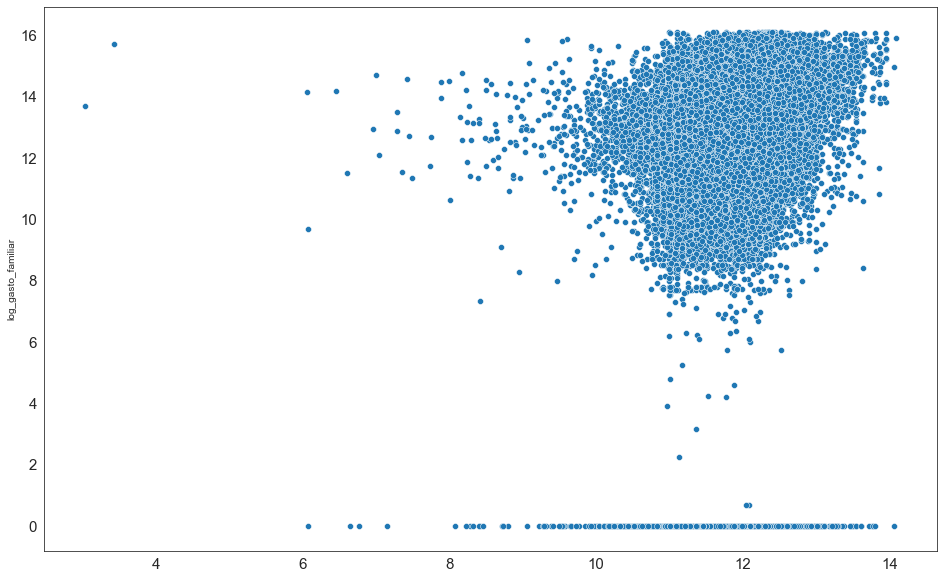

In [352]:
sns.scatterplot(y_pred, y_test)

In [75]:
from sklearn.neural_network import MLPRegressor

In [76]:
regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)

In [77]:
nn_predictions = regr.predict(X_test)
mean_absolute_percentage_error(nn_predictions, y_test)

3.7987137491026854

# GLM

In [87]:
fe_dataframe.modeling_dataframe[glm_features].isnull().sum()

ingreso_final                     0
ingreso_calculado                 0
cuota_cred_hipot_pct              0
cupo_total_tc                     0
cuota_tarjeta_de_credito_pct      0
cuota_de_consumo_pct              0
cuota_rotativos_pct               0
cuota_libranza_sf_pct             0
genero                            0
cuota_de_sector_solidario_pct     0
cuota_sector_real_comercio_pct    0
ind_mora_vigente                  0
ind_annio                         0
cuota_tc_bancolombia_pct          0
cupo_tc_mdo                       0
convenio_lib                      0
cant_oblig_tot_sf                 0
edad                              0
estado_civil_DIV                  0
estado_civil_NI                   0
estado_civil_OTRO                 0
estado_civil_SOL                  0
estado_civil_UL                   0
estado_civil_VIU                  0
ind                               0
nro_tot_cuentas                   0
ctas_activas                      0
ingreso_nomina              

In [106]:
# Fit Poisson regression of sat by weight\
glm_feat_formula = [
    'ingreso_corr_log',
    'cuota_cred_hipot_log',
    'cupo_total_tc_log',
    # 'cuota_tarjeta_de_credito_log',
    'cuota_de_consumo_log',
    'edad',
    # 'genero',
    'cuota_tc_bancolombia_log',
    'ind_annio',
    # 'cupo_tc_mdo_log',
   # 'edad:ingreso_corr',
   # 'edad*cuota_cred_hipot_log',
   #  'genero:ingreso_corr',
    'obl_total_pct',
    'ingreso_geo_alto',
    'ingreso_cero',
    'es_ciudad_principal'
]
glm_formula = 'np.log(gasto_familiar+1) ~ ' + ' + '.join(feature_cols)
glm_features = feature_cols + ['gasto_familiar']
glm_data = fe_dataframe.modeling_dataframe[glm_features]
# glm_data = glm_data[glm_data['gasto_familiar'] < 10000000]
model = glm( glm_formula, data = glm_data,
            family = sm.families.Poisson()).fit()

# Display model results
print(model.summary())

                     Generalized Linear Model Regression Results                      
Dep. Variable:     np.log(gasto_familiar + 1)   No. Observations:                78875
Model:                                    GLM   Df Residuals:                    78858
Model Family:                         Poisson   Df Model:                           16
Link Function:                            log   Scale:                          1.0000
Method:                                  IRLS   Log-Likelihood:            -2.0000e+05
Date:                        Wed, 20 Jan 2021   Deviance:                       56226.
Time:                                17:37:25   Pearson chi2:                 3.06e+04
No. Iterations:                             4                                         
Covariance Type:                    nonrobust                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------

g:\mi unidad\packen\data analysis\python\p_projects\bc-dataton\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='gasto_familiar', ylabel='Density'>

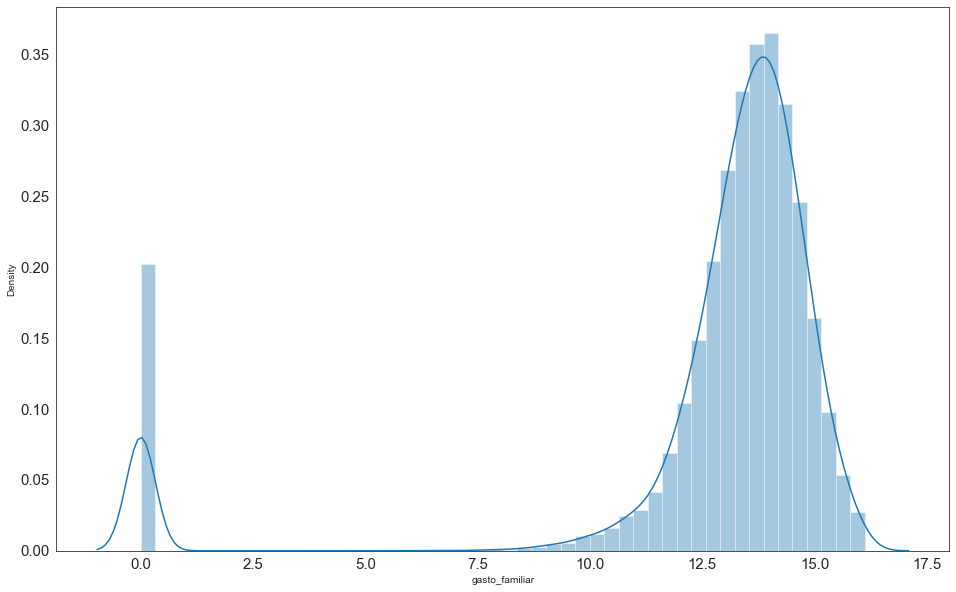

In [295]:
sns.distplot(np.log(glm_data['gasto_familiar']+1))

In [133]:
glm_data.describe(include='all')

,ingreso_final,ingreso_calculado,cuota_cred_hipot_pct,cupo_total_tc,cuota_tarjeta_de_credito_pct,cuota_de_consumo_pct,cuota_rotativos_pct,cuota_libranza_sf_pct,genero,cuota_de_sector_solidario_pct,...,ingreso_segurida_social,rep_calif_cred_B,rep_calif_cred_C,rep_calif_cred_D,rep_calif_cred_E,rep_calif_cred_F,rep_calif_cred_G,rep_calif_cred_H,rep_calif_cred_NApl,gasto_familiar
count,1013400.00000,1013400.00000,1013400.00000,1013400.00000,1013400.00000,1013400.00000,1013400.00000,1013400.00000,1013400.00000,1013400.00000,...,1013400.00000,1013400.00000,1013400.00000,1013400.00000,1013400.00000,1013400.00000,1013400.00000,1013400.00000,1013400.00000,1013400.00000
mean,14.76997,2001145.57726,0.02100,6.00252,0.10404,0.19464,0.00570,0.02850,0.49557,0.01854,...,4.05077,0.13744,0.13861,0.11183,0.06993,0.04012,0.11104,0.09627,0.09490,765522.03685
std,1.56519,3777353.15946,0.14252,7.63325,0.47243,2.41957,0.30507,0.50487,0.49998,0.59299,...,6.53894,0.34431,0.34554,0.31516,0.25503,0.19624,0.31418,0.29496,0.29308,1058623.99122
min,0.00000,0.00000,-0.43312,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,14.26020,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,180354.00000
50%,14.79485,807503.00000,0.00000,0.00000,0.02056,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,426113.00000
75%,15.39770,2719204.50000,0.00000,15.29712,0.11120,0.14480,0.00000,0.00000,1.00000,0.00000,...,13.62691,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,910449.10500
max,21.18475,381096170.00000,62.76979,20.10337,137.49425,1017.77375,283.65719,117.11432,1.00000,301.53884,...,19.06253,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,9999293.00000


In [332]:
glm_predictions = model.predict(fe_dataframe.modeling_dataframe[glm_features])

g:\mi unidad\packen\data analysis\python\p_projects\bc-dataton\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

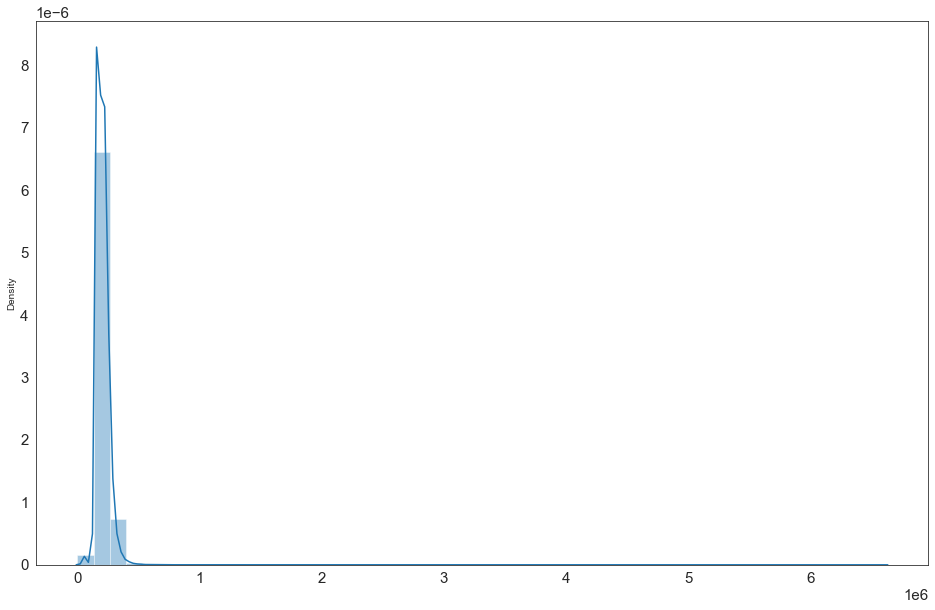

In [151]:
exp_prediction = np.exp(glm_predictions) - 1
sns.distplot(exp_prediction[exp_prediction < 10000000])

g:\mi unidad\packen\data analysis\python\p_projects\bc-dataton\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
g:\mi unidad\packen\data analysis\python\p_projects\bc-dataton\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
g:\mi unidad\packen\data analysis\python\p_projects\bc-dataton\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future vers

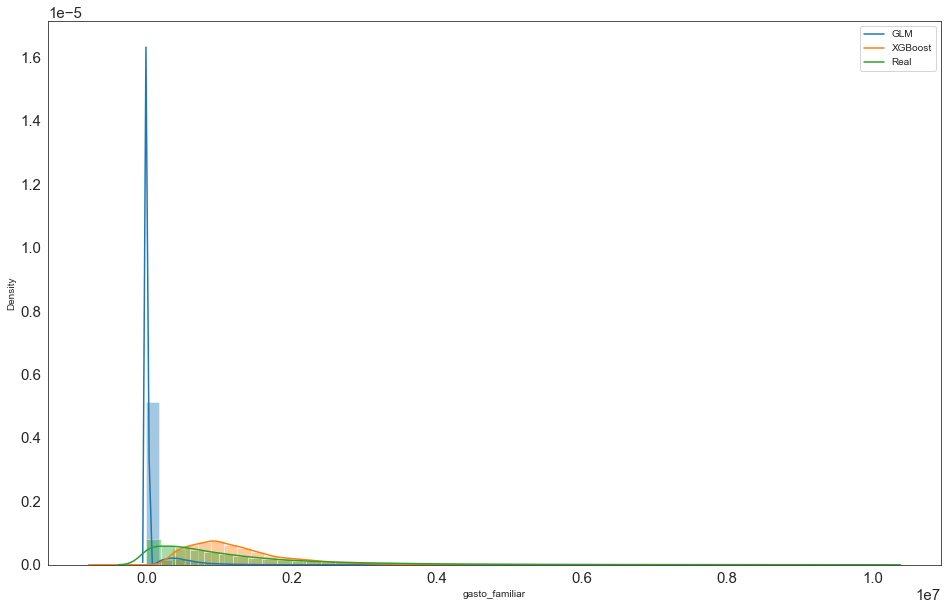

In [334]:
sns.distplot(final_predictions_glm[final_predictions_glm <  10000000])
sns.distplot(y_pred)
sns.distplot(fe_dataframe.modeling_dataframe['gasto_familiar'])
plt.legend(['GLM', "XGBoost", "Real"])

# DL model

In [150]:
nn_model = Sequential()
nn_model.add(Dense(30, activation = 'relu', input_shape = (X.shape[1],))) #Primera capa oculta, justo después de la capa input de 3 variables
nn_model.add(Dropout(0.2))
nn_model.add(Dense(30, activation = 'relu'))
nn_model.add(BatchNormalization())
nn_model.add(Dense(30, activation = 'relu'))
nn_model.add(Dense(1))

nn_model.compile(optimizer = 'adam', loss = 'mse')
nn_model.fit(X_train, y_train, epochs=20)

Epoch 1/20
3355/3355 [==============================] - 5s 1ms/step - loss: 38.2824
Epoch 2/20
3355/3355 [==============================] - 4s 1ms/step - loss: 12.7941
Epoch 3/20
3355/3355 [==============================] - 4s 1ms/step - loss: 12.4961
Epoch 4/20
3355/3355 [==============================] - 4s 1ms/step - loss: 12.8006
Epoch 5/20
3355/3355 [==============================] - 4s 1ms/step - loss: 12.6510
Epoch 6/20
3355/3355 [==============================] - 4s 1ms/step - loss: 12.3454
Epoch 7/20
3355/3355 [==============================] - 4s 1ms/step - loss: 12.5507
Epoch 8/20
3355/3355 [==============================] - 4s 1ms/step - loss: 12.4897
Epoch 9/20
3355/3355 [==============================] - 4s 1ms/step - loss: 12.5531
Epoch 10/20
3355/3355 [==============================] - 4s 1ms/step - loss: 12.5549
Epoch 11/20
3355/3355 [==============================] - 4s 1ms/step - loss: 12.3447
Epoch 12/20
3355/3355 [==============================] - 4s 1ms/step - los

In [87]:
nn_predictions = nn_model.predict(X_test)
mean_absolute_percentage_error(nn_predictions, y_test)

0.8384442947941376

# test

In [26]:
test_df = pd.read_csv("test_cleaned.csv").drop("Unnamed: 0", axis=1)
test_df

,id_registro,periodo,id_cli,edad,genero,estado_civil,ult_actual,ind_mora_vigente,departamento_residencia,mora_max,...,saldo_prom3_tdc_mdo,cuota_tc_mdo,saldo_no_rot_mdo,cuota_libranza_sf,cant_oblig_tot_sf,ind,rep_calif_cred,convenio_lib,ingreso_nomina,ingreso_segurida_social
0,4055#201902,201902,4055,46,M,CAS,20180807,N,ANTIOQUIA,NApl,...,282500.00000,19000.00000,127148000.00000,1797000.00000,7,2060457.20000,A,S,2734528.00000,0.00000
1,12598#201902,201902,12598,43,M,SOL,20180130,N,CUNDINAMARCA,Entre 0 y 30 dias,...,0.00000,0.00000,87661000.00000,0.00000,5,-71874365.80000,H,S,2291070.00000,0.00000
2,23697#201902,201902,23697,45,M,CAS,20190110,N,BOGOTA D.C.,Entre 0 y 30 dias,...,33000.00000,33000.00000,58967000.00000,0.00000,3,-1448765.30000,A,S,0.00000,0.00000
3,23768#201902,201902,23768,58,M,NI,20180208,N,BOGOTA D.C.,NApl,...,0.00000,0.00000,0.00000,0.00000,0,2208260.39000,G,S,0.00000,0.00000
4,7174#201902,201902,7174,52,F,DIV,20180825,N,BOGOTA D.C.,Entre 0 y 30 dias,...,4088500.00000,11000.00000,22746000.00000,0.00000,7,3212635.74000,A,S,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281661,8596193#202011,202011,8596193,47,F,SOL,20201010,N,ANTIOQUIA,Entre 0 y 30 dias,...,0.00000,0.00000,0.00000,0.00000,2,2101424.08500,A,S,2281362.50000,3876343.00000
281662,8616083#202011,202011,8616083,35,M,NI,20201003,N,BOGOTA D.C.,Entre 0 y 30 dias,...,8286666.66700,237000.00000,99000.00000,0.00000,12,11705497.77500,C,S,14510896.00000,0.00000
281663,8670207#202011,202011,8670207,47,M,DIV,20200616,N,CUNDINAMARCA,Entre 0 y 30 dias,...,30917000.00000,10350000.00000,300000.00000,0.00000,17,-41547904.85000,D,S,0.00000,0.00000
281664,8677655#202011,202011,8677655,42,F,CAS,20200423,N,ANTIOQUIA,Entre 0 y 30 dias,...,37608666.66700,1953000.00000,184811000.00000,0.00000,18,5313457.01250,B,S,11401109.00000,14481371.00000


In [59]:
final_prediction

0         661604.40069
1         985983.87458
2         897955.95914
3         347347.60933
4         682651.64371
              ...     
281661    454408.37963
281662   1171165.12779
281663   2991076.58477
281664   1017050.63458
281665    711716.64829
Length: 281666, dtype: float64

In [76]:
final_predictions_nn.reshape(-1,).shape

(281666,)

In [72]:
final_predictions_xgb.shape

(281666,)

In [88]:
test_df['cuota_de_consumo'] = np.where(test_df['cuota_de_consumo'] <0 ,0, test_df['cuota_de_consumo'])
test_df_modeling = DataFramePreProcessor(test_df, test=True)
test_df_modeling.process()
#final_prediction_cat = cat_reg.predict(test_df_modeling.modeling_dataframe[feature_cols])

In [183]:
final_predictions_xgb_log=np.exp(xgb_reg_log.predict(test_df_modeling.modeling_dataframe[feature_cols]))-1
final_predictions_xgb=xgb_reg.predict(test_df_modeling.modeling_dataframe[feature_cols])
final_predictions_glm=np.exp(model.predict(test_df_modeling.modeling_dataframe[feature_cols]))-1
final_predictions_nn=nn_model.predict(test_df_modeling.modeling_dataframe[feature_cols])                  
final_prediction = final_predictions_glm*0.25 + final_predictions_xgb*0.25 + \
                   final_predictions_nn.reshape(-1,)*0.25 + final_predictions_xgb_log*0.25

In [139]:
xgb_train=xgb_reg.predict(X_test)
nn_train=nn_model.predict(X_test)
glm_train = np.exp(model.predict(X_test))-1
ensemble_score= xgb_train*0.5 + glm_train*0.0 + nn_train.reshape(-1,)*0.5
mean_absolute_percentage_error(ensemble_score, y_test)

0.9999746524016796

g:\mi unidad\packen\data analysis\python\p_projects\bc-dataton\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
g:\mi unidad\packen\data analysis\python\p_projects\bc-dataton\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='gasto_familiar', ylabel='Density'>

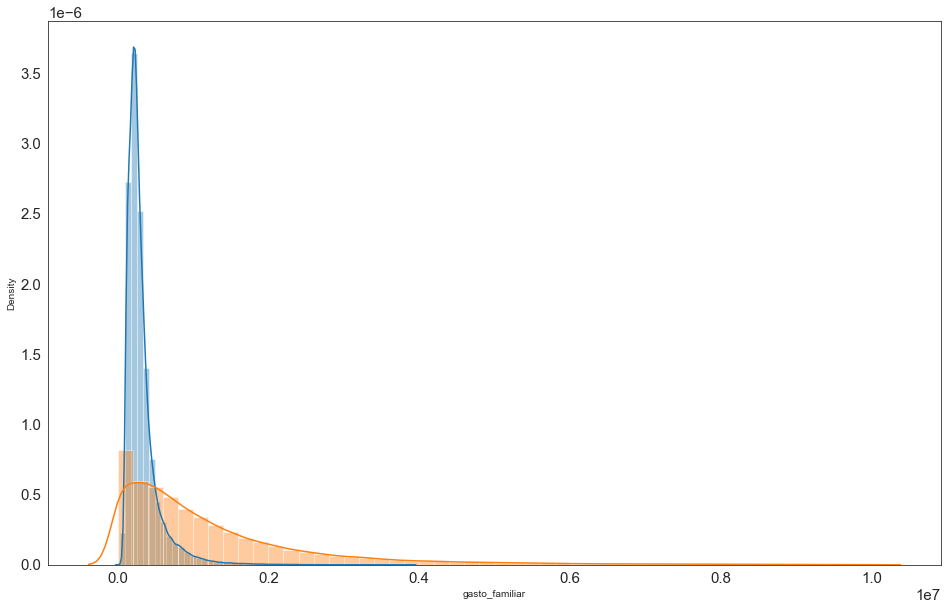

In [184]:
sns.distplot(final_prediction[final_prediction < 10000000])
#sns.distplot(final_predictions_nn[final_predictions_nn < 10000000])
sns.distplot(fe_dataframe.modeling_dataframe['gasto_familiar'])
#sns.distplot(y_test)

In [185]:
submission = pd.concat([test_df['id_registro'],pd.Series(final_prediction)], axis=1)
submission.columns = ["id_registro", "gasto_familiar"]
submission['gasto_familiar'] = submission['gasto_familiar'].round(4)
submission['gasto_familiar'] = np.where(submission['gasto_familiar'] > 10000000, 10000000, submission['gasto_familiar'])
submission

,id_registro,gasto_familiar
0,4055#201902,254486.45140
1,12598#201902,269680.37080
2,23697#201902,323651.26380
3,23768#201902,216778.38190
4,7174#201902,369292.42640
...,...,...
281661,8596193#202011,301050.72020
281662,8616083#202011,640165.57000
281663,8670207#202011,1589629.13130
281664,8677655#202011,502436.08200


In [92]:
class PrepareSubmission:
    
    def __init__(self, dataframe, model):
        self.test_dataframe = dataframe
        self.model = model
     
    def makePrediction(self, dataframe)
        test_df_modeling = DataFramePreProcessor(test_df, test=True)
        test_df_modeling.process()
        final_predictions=xgb_reg.predict(test_df_modeling.modeling_dataframe[feature_cols])
    
    
    def prepareSubmissionDF(self, dataframe):
        submission = pd.concat([test_df['id_registro'],pd.Series(final_predictions)], axis=1)
        submission.columns = ["id_registro", "gasto_familiar"]
    
    
    def submit(self):
        submission.to_csv("submission_underground.csv", index=False)

In [186]:
submission.to_csv("submission_underground.csv", index=False)

In [349]:
final_prediction[final_prediction < 0]

32        -49577.95957
37        -31132.87461
62        -53999.65246
87        -84479.18775
107       -13693.60451
              ...     
281250   -157127.52459
281302     -9315.22841
281462    -12892.82637
281547    -16814.90453
281553    -13733.63068
Length: 8545, dtype: float64

# Compare predictions


In [12]:
best_submission = pd.read_csv("submission_underground_tuned.csv")
best_submission_2 =  pd.read_csv("submission_underground XGBoost+17meses+Boxcox+Log.csv")

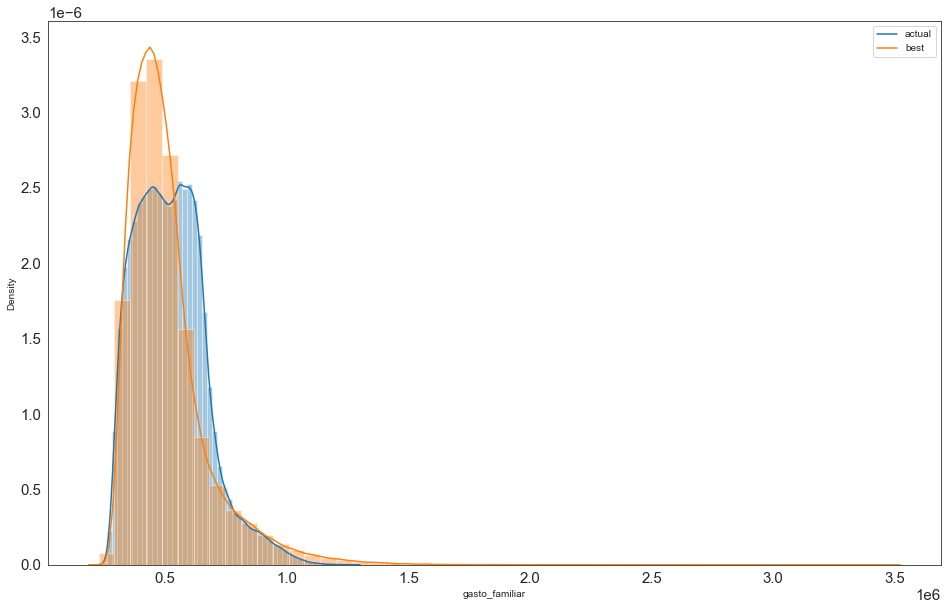

In [134]:
sns.distplot(submission['gasto_familiar'])
#sns.distplot(fe_dataframe.modeling_dataframe['gasto_familiar'])

#sns.distplot(best_submission_2[best_submission_2['gasto_familiar'] < 10000000]['gasto_familiar'])
sns.distplot(best_submission[best_submission['gasto_familiar'] < 10000000]['gasto_familiar'])

plt.legend(['actual', 'best'])

In [119]:
submission['gasto_familiar'].describe()

count    281666.00000
mean     503190.02846
std      138474.46877
min      261052.58630
25%      421731.35657
50%      471029.01475
75%      533102.10875
max     3704349.85220
Name: gasto_familiar, dtype: float64

In [147]:
test_submission = best_submission.copy()
test_submission['gasto_familiar'] =  test_submission['gasto_familiar']+  np.random.normal(5000, 50000, best_submission.shape[0])

<AxesSubplot:xlabel='gasto_familiar', ylabel='Density'>

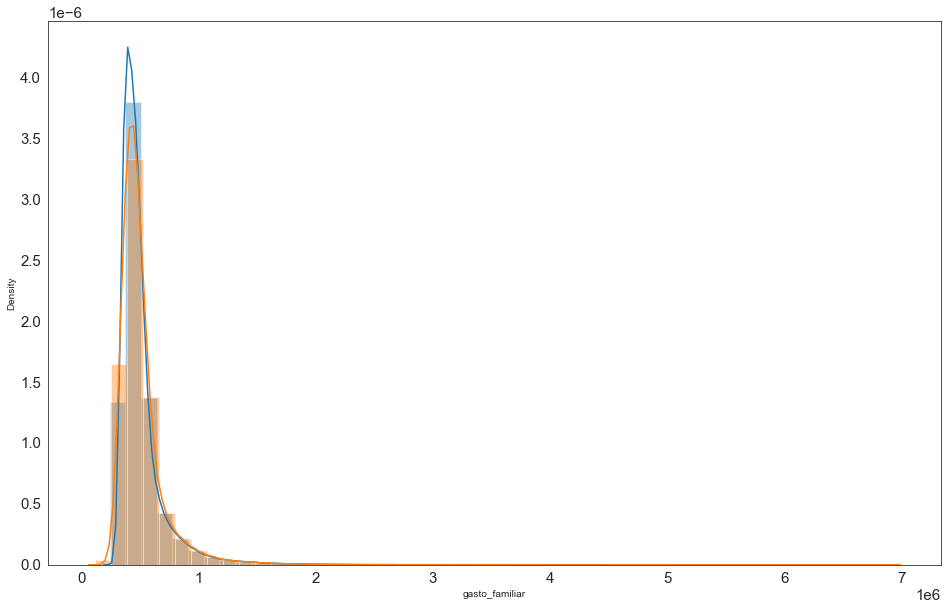

In [148]:
sns.distplot(best_submission[best_submission['gasto_familiar'] < 10000000]['gasto_familiar'])
sns.distplot(test_submission[test_submission['gasto_familiar'] < 10000000]['gasto_familiar'])


In [149]:
test_submission.to_csv("test_submission.csv", index=False)